In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import re
import numpy as np
import seaborn as sns


plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.markerscale'] = 2.0

thesis_plt_params = {
    'figsize_x': 15,
    'figsize_y': 8,
    'axes.titlesize': 24,
    'axes.labelsize': 18,
    'ticks.labelsize': 16,
    'legend.markerscale': 2,
    'legend.fontsize': 18
}


presentation_plt_params = {
    'figsize_x': 24,
    'figsize_y': 12,
    'axes.titlesize': 24,
    'axes.labelsize': 18,
    'ticks.labelsize': 12,
    'legend.markerscale': 1,
    'legend.fontsize': 12,
}

In [3]:
graph_colors = {
    'baseline': 'black',
    '0p': u'#1f77b4',
    '2p': u'#c66093',
    '5p': u'#ff7f0e',
    '10p': u'#2ca02c',
    '20p': u'#d62728',
}

graph_markers = {
    's0': 'o',
    's1': 's',
    's2': '^'
}

starting_fuel = {
    'GT3': 30,
    'F317': 22,
}

training_infos = {
    # Monza tracks
    # 'monza_gt3_0211': {
    #     'sequences': [
    #         {
    #             'summary': r'..\..\summaries\updated_summaries\monza_gt3_0211_updated_summary.csv',
    #             'original_summary': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250211_222953.100\summary.csv',
    #             'laps': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250211_222953.100\laps',
    #         }
    #     ],
    #     'reward_used': 'No fuel penalty',
    #     'seed': 0,
    #     'map': 'monza',
    #     'car': 'BMW Z4 GT3',
    #     'graph_color': graph_colors['0p'],
    #     'graph_markers': graph_markers['s0'],
    # },

    # 'monza_gt3_0211_fuel_2p': {
    #     'sequences': [
    #         {
    #             'summary': r'..\..\summaries\updated_summaries\monza_gt3_0211_fuel_2p_updated_summary.csv',
    #             'original_summary': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250314_153934.112\summary.csv',
    #             'laps': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250314_153934.112\laps',
    #         }
    #     ],
    #     'reward_used': 'Fuel penalty 2%',
    #     'seed': 0,
    #     'map': 'monza',
    #     'car': 'BMW Z4 GT3',
    #     'graph_color': graph_colors['2p'],
    #     'graph_markers': graph_markers['s0'],
    # },

    
    '0501_monza_gt3_fuel_2p_seed_0': {
        'reward_used': 'Fuel penalty 2%',
        'seed': 0,
        'map': 'monza',
        'car': 'BMW Z4 GT3',
        'graph_color': graph_colors['2p'],
        'graph_markers': graph_markers['s0'],
        'sequences': [
            {
                'summary': r'..\..\summaries\moved_summaries\summary_20250501_232803.965.csv',
            }
        ]
    },

    # '0503_monza_gt3_fuel_5p_seed_0': {
    #     'reward_used': 'Fuel penalty 5%',
    #     'seed': 0,
    #     'map': 'monza',
    #     'car': 'BMW Z4 GT3',
    #     'graph_color': graph_colors['5p'],
    #     'graph_markers': graph_markers['s0'],
    #     'sequences': [
    #         {
    #             'summary': r'..\..\summaries\moved_summaries\summary_20250503_030820.939.csv',
    #         }
    #     ]
    # },

    # Redbull tracks
    # this one had a constant steer angle problem
    'redbull_gt3_1703': {
        'sequences': [
            {
                'summary': r'..\..\summaries\updated_summaries\redbull_gt3_1703_updated_summary.csv',
                'original_summary': r'..\..\summaries\moved_summaries\summary_20250317_034633.066.csv',
                'laps': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250317_034633.066\laps',
                'notes': 'Best lap: 94.696, constant steer angle',
            }
        ],
        'reward_used': 'No fuel penalty',
        'map': 'redbull',
        'car': 'BMW Z4 GT3',
        'seed': 0,
        'graph_color': graph_colors['0p'],
        'graph_markers': graph_markers['s0'],
    },

    # this one had -20000 reward at one step
    'redbull_gt3_1803_fuel_5p': {
        'sequences': [
            {
                'summary': r'..\..\summaries\updated_summaries\redbull_gt3_1803_fuel_5p_updated_summary.csv',
                'original_summary': r'..\..\summaries\moved_summaries\summary_20250324_115657.805_fuel_5p.csv',
                'laps': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250324_115657.805_fuel_5p\laps',
                'notes': 'Best lap: 96.591, reward function -20000 here',
            }
        ],
        'reward_used': 'Fuel penalty 5%',
        'map': 'redbull',
        'car': 'BMW Z4 GT3',
        'seed': 0,
        'graph_color': graph_colors['5p'],
        'graph_markers': graph_markers['s0'],
    },

    # this one had a constant steer angle problem
    'redbull_gt3_2503_fuel_5p': {
        'reward_used': 'Fuel penalty 5%',
        'map': 'redbull',
        'car': 'BMW Z4 GT3',
        'seed': 0,
        'graph_color': graph_colors['5p'],
        'graph_markers': graph_markers['s1'],
        'sequences': [{
            'summary': r'..\..\summaries\updated_summaries\redbull_gt3_2503_fuel_5p_updated_summary.csv',
            'original_summary': r'..\..\summaries\moved_summaries\summary_20250325_134758.156_redbull_gt3_fuel_5p.csv',
            'laps': r'D:\20250325_134758.156_redbull_gt3_fuel_5p\laps',
            'notes': 'Best lap: 95.47, constant steer angle',
            'last_ep': 173,
        }, {
            'summary': r'..\..\summaries\moved_summaries\summary_20250421_134742.180.csv',
            'laps': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250421_134742.180\laps',
            'first_ep': 6
        }
        ]
    },

    'redbull_gt3_2603_fuel_5p': {
        'reward_used': 'Fuel penalty 5%',
        'map': 'redbull',
        'car': 'BMW Z4 GT3',
        'seed': 1,
        'graph_color': graph_colors['5p'],
        'graph_markers': graph_markers['s2'],
        'sequences': [{
            'summary': r'..\..\summaries\updated_summaries\redbull_gt3_2603_fuel_5p_updated_summary.csv',
            'original_summary': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250326_053905.584\summary.csv',
            'laps': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250326_053905.584\laps',
            'notes': 'Best lap: 95.094',
        },
        # {
        #     'summary': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250416_020837.858\summary.csv',
        #     'laps': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250416_020837.858\laps',
        #     'last_ep': 23,
        # }
        ]
    },

    'redbull_gt3_2803': {
        'reward_used': 'No fuel penalty',
        'map': 'redbull',
        'car': 'BMW Z4 GT3',
        'seed': 1,
        'graph_color': graph_colors['0p'],
        'graph_markers': graph_markers['s1'],
        'sequences': [{
            'summary': r'..\..\summaries\updated_summaries\redbull_gt3_2803_updated_summary.csv',
            'original_summary': r"..\..\summaries\moved_summaries\summary_20250328_044951.506_no_fuel_seed_1.csv",
            'laps': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250328_044951.506_no_fuel_seed_1\laps",
            'notes': 'Best lap: 94.838',
        }, {
            'summary': r'..\..\summaries\moved_summaries\summary_20250418_040230.496.csv',
            'laps': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250418_040230.496\laps',
        }, {
            'summary': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250513_222046.322\summary.csv",
            'laps': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250513_222046.322\laps',
            'first_ep': 7,
            'plot': False
        }]
    },

    'redbull_gt3_2903_fuel_10p': {
        'reward_used': 'Fuel penalty 10%',
        'map': 'redbull',
        'car': 'BMW Z4 GT3',
        'seed': 1,
        'graph_color': graph_colors['10p'],
        'graph_markers': graph_markers['s0'],
        'sequences': [{
            'summary': r'..\..\summaries\updated_summaries\redbull_gt3_2903_fuel_10p_updated_summary.csv',
            'original_summary': r'..\..\summaries\moved_summaries\summary_20250329_145743.601.csv',
            'laps': r'D:\20250329_145743.601\laps',
            'notes': 'Best lap: 94.969',
        },
        {
            'summary': r'..\..\summaries\moved_summaries\summary_20250417_071922.055.csv',
            'laps': r'D:\20250417_071922.055\laps',
        }]
    },

    'redbull_gt3_3003_fuel_10p': {
        'reward_used': 'Fuel penalty 10%',
        'map': 'redbull',
        'car': 'BMW Z4 GT3',
        'seed': 2,
        'graph_color': graph_colors['10p'],
        'graph_markers': graph_markers['s1'],
        'sequences': [{
            'summary': r'..\..\summaries\updated_summaries\redbull_gt3_3003_fuel_10p_updated_summary.csv',
            'original_summary': r'..\..\summaries\moved_summaries\summary_20250330_064235.735.csv',
            'laps': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250330_064235.735\laps',
            'notes': 'Best lap: 94.636',
        },
        {
            'summary': r'..\..\summaries\moved_summaries\summary_20250419_061204.201.csv',
            'laps': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250419_061204.201\laps',
        }
        ]
    },
    
    'redbull_gt3_2903_fuel_20p': {
        'sequences': [
            {
                'summary': r'..\..\summaries\updated_summaries\redbull_gt3_2903_fuel_20p_updated_summary.csv',
                'original_summary': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250329_044937.408\summary.csv',
                'laps': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250329_044937.408\laps',
                'notes': 'Best lap: 115.933',
            }
        ],
        'reward_used': 'Fuel penalty 20%',
        'map': 'redbull',
        'car': 'BMW Z4 GT3',
        'seed': 1,
        'graph_color': graph_colors['20p'],
        'graph_markers': graph_markers['s0'],
    },

    'redbull_gt3_baseline_policy': {
        'sequences': [
            {
                'summary': r'..\..\summaries\updated_summaries\redbull_gt3_baseline_summary_reward_only.csv',  # this df is incomplete and doesn't have LapNo_i_Time columns and fuel info
                'laps': r'C:\data_sets\data_sets\ks_red_bull_ring-layout_gp\bmw_z4_gt3\20240409_SAC_10M\laps',
                'notes': 'Best lap: 93.105',
            }
        ],
        'reward_used': 'Baseline policy (No fuel penalty)',
        'map': 'redbull',
        'car': 'BMW Z4 GT3',
        'seed': 0,
        'graph_color': graph_colors['baseline'],
        'graph_markers': graph_markers['s0'],
    },
    
    '0423_redbull_f317_seed_0': {
        'reward_used': 'No fuel penalty',
        'map': 'redbull',
        'car': 'Dallara F317',
        'seed': 0,
        'graph_color': graph_colors['0p'],
        'graph_markers': graph_markers['s0'],
        'sequences': [
            {
                'summary': r'..\..\summaries\moved_summaries\summary_20250424_201039.714.csv',
            },
            {
                'summary': r'..\..\summaries\moved_summaries\summary_20250425_134528.178.csv'
            }
        ]
    },

    '0426_redbull_f317_fuel_5p_seed_0': {
        'reward_used': 'Fuel penalty 5%',
        'map': 'redbull',
        'car': 'Dallara F317',
        'seed': 0,
        'graph_color': graph_colors['5p'],
        'graph_markers': graph_markers['s0'],
        'sequences': [
            {
                'summary': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250426_234535.673\summary.csv",
            },
            {
                'summary': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250427_221920.975\summary.csv",
                'first_ep': 40
            }
        ]
    },

    '0504_monza_gt3_seed_2': {
        'reward_used': 'No fuel penalty',
        'map': 'monza',
        'car': 'BMW Z4 GT3',
        'seed': 0,
        'graph_color': graph_colors['0p'],
        'graph_markers': graph_markers['s0'],
        'sequences': [
            {
                'summary': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250507_214948.106\summary.csv',
            },
            {
                'summary': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250508_141803.915\summary.csv',
                'last_ep': 78
            }, 
            {
                'summary': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250509_010456.581\summary.csv',
            },

        ]
    }
}

In [4]:
human_data = {
    'base_path': r'C:\AssettoCorsaGymDataSet\data_sets',
    'monza': {
        'path': r'monza',
        'F317': {
            'path': r'dallara_f317\*\laps',
        },
        'GT3': {
            'path': r'bmw_z4_gt3\*\laps',
            'omit_dirs': ['20241108_SAC']
        }
    },
    'redbull': {
        'path': r'ks_red_bull_ring-layout_gp',
        'F317': {
            'path': r'dallara_f317\*\laps',
        },
        'GT3': {
            'path': r'bmw_z4_gt3\*\laps',
            'omit_dirs': ['20240409_SAC_10M']
        }
    }
}

### Define a utility function to combine sequences

In [5]:
def combine_sequences(training_info: str, omit_not_plot: bool = True) -> pd.DataFrame:
    episode_offset = 0
    combined_df = pd.DataFrame()

    for seq_idx, sequence in enumerate(training_info['sequences']):
        if sequence.get('plot', True) == False and omit_not_plot:
            continue
        summary_df = pd.read_csv(sequence['summary'])
        skip_episode_count = 0

        first_ep = sequence.get('first_ep', None)
        last_ep = sequence.get('last_ep', None)
        if first_ep is not None:
            summary_df = summary_df[summary_df['episode'] >= first_ep]
            skip_episode_count = first_ep
        if last_ep is not None:
            summary_df = summary_df[summary_df['episode'] <= last_ep]
        
        summary_df['episode'] += episode_offset
        summary_df['episode'] -= skip_episode_count
        episode_offset = summary_df['episode'].max() + 1
        combined_df = pd.concat([combined_df, summary_df], ignore_index=True)
    
    return combined_df


def extract_fuel_penalty(reward_text):
    match = re.search(r'(\d+)%', reward_text)
    if match:
        return int(match.group(1))
    elif 'no fuel penalty' in reward_text.lower():
        return 0
    else:
        return float('inf')  # in case of unexpected text


In [6]:
import os

training_infos_monza_gt3 = {key: value for key, value in training_infos.items() if value.get('map') == 'monza' and value.get('car') == 'BMW Z4 GT3'}
training_infos_redbull_gt3 = {key: value for key, value in training_infos.items() if value.get('map') == 'redbull' and value.get('car') == 'BMW Z4 GT3'}
training_infos_redbull_f317 = {key: value for key, value in training_infos.items() if value.get('map') == 'redbull' and value.get('car') == 'Dallara F317'}

In [7]:
def get_total_training_episodes(training_key: str, training_infos: dict) -> int:
    if training_key not in training_infos:
        raise KeyError(f"Training key '{training_key}' not found in training_infos.")

    training_info = training_infos[training_key]
    episode_offset = 0

    for sequence in training_info['sequences']:
        summary_df = pd.read_csv(sequence['summary'])

        first_ep = sequence.get('first_ep', None)
        last_ep = sequence.get('last_ep', None)
        skip_episode_count = 0

        if first_ep is not None:
            summary_df = summary_df[summary_df['episode'] >= first_ep]
            skip_episode_count = first_ep
        if last_ep is not None:
            summary_df = summary_df[summary_df['episode'] <= last_ep]

        summary_df['episode'] += episode_offset
        summary_df['episode'] -= skip_episode_count
        episode_offset = summary_df['episode'].max() + 1

    return episode_offset


### Get lap distance for each track

In [8]:
def get_distance(track):
    # Returns distance in km
    distances = {
        'Austria': 4318, # in meters
        'Monza': 5793
    }

    return distances[track] / 1000

# Tables

In [9]:
import pandas as pd
from tabulate import tabulate

def best_lap_time_and_fuel(training_infos, track, max_lap_time=np.inf, max_lap_fuel=np.inf):
    results = []
    sorted_training_infos = dict(
        sorted(
            training_infos.items(),
            key=lambda item: extract_fuel_penalty(item[1]['reward_used'])
        )
    )
    for training_key, training_info in sorted_training_infos.items():
        summary_df = combine_sequences(training_info, omit_not_plot=False)

        lap_indices = set()
        for col in summary_df.columns:
            match = re.match(r'LapNo_(\d+)_Time', col)
            if match:
                lap_indices.add(int(match.group(1)))

        best_time = np.inf
        best_fuel = None

        for i in sorted(lap_indices):
            time_col = f'LapNo_{i}_Time'
            fuel_col = f'LapNo_{i}_Fuel'

            if time_col in summary_df.columns and fuel_col in summary_df.columns:
                valid_rows = summary_df[(summary_df[time_col] <= max_lap_time) & (summary_df[fuel_col] <= max_lap_fuel)]

                if not valid_rows.empty:
                    min_time_row = valid_rows.loc[valid_rows[time_col].idxmin()]
                    lap_time = min_time_row[time_col]
                    lap_fuel = min_time_row[fuel_col]

                    if lap_time < best_time:
                        best_time = lap_time
                        best_fuel = (lap_fuel * 10)# * 100 / get_distance(track)

        if best_time < np.inf:
            results.append({
                "Key": training_key,
                "Reward": training_info['reward_used'],
                "Seed": training_info['seed'],
                "Car": training_info['car'],
                "Track": training_info['map'],
                "Best Lap Time (s)": best_time,
                "FC for Best Lap": best_fuel,
                "Episodes": get_total_training_episodes(training_key, training_infos)
            })

    results_df = pd.DataFrame(results)
    print(tabulate(results_df, headers='keys', tablefmt='psql', showindex=False))


# Example usage:
best_lap_time_and_fuel(training_infos_redbull_gt3, track='Austria')
best_lap_time_and_fuel(training_infos_redbull_f317, track='Austria')
best_lap_time_and_fuel(training_infos_monza_gt3, track='Monza')


+---------------------------+------------------+--------+------------+---------+---------------------+-------------------+------------+
| Key                       | Reward           |   Seed | Car        | Track   |   Best Lap Time (s) |   FC for Best Lap |   Episodes |
|---------------------------+------------------+--------+------------+---------+---------------------+-------------------+------------|
| redbull_gt3_1703          | No fuel penalty  |      0 | BMW Z4 GT3 | redbull |              94.969 |           1.8778  |       1563 |
| redbull_gt3_2803          | No fuel penalty  |      1 | BMW Z4 GT3 | redbull |              92.851 |           1.81574 |        768 |
| redbull_gt3_1803_fuel_5p  | Fuel penalty 5%  |      0 | BMW Z4 GT3 | redbull |              96.591 |           1.88534 |        420 |
| redbull_gt3_2503_fuel_5p  | Fuel penalty 5%  |      0 | BMW Z4 GT3 | redbull |              92.565 |           1.59035 |        474 |
| redbull_gt3_2603_fuel_5p  | Fuel penalty 5%  |

# Learning curves

In [10]:
# import pandas as pd

# plt.figure(figsize=(5, 3))

# for training_key, training_info in training_infos_monza.items():
#     summary_df = pd.read_csv(training_info['summary'])
#     # Filter out rows where BestLap is 0
#     filtered_df = summary_df[summary_df['BestLap'] != 0]
    
#     plt.plot(filtered_df['episode'], filtered_df['BestLap'], label=training_info['reward_used'])

# plt.title('Training Comparison: BestLap over Episodes (track: Monza)')
# plt.xlabel('Episode')
# plt.ylabel('BestLap')
# plt.legend()
# plt.tight_layout()
plt.show()

In [11]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import os

# plt.figure(figsize=(30, 8))

# for training_key, training_info in training_infos_redbull.items():
#     summary_df = pd.read_csv(training_info['summary'])
#     # Filter out rows where BestLap is 0 (only first 500 values)
#     filtered_df = summary_df.loc[:499,:][summary_df['BestLap'] != 0]
#     plt.plot(filtered_df['episode'], filtered_df['BestLap'], 
#              label=f"{training_info['reward_used']} seed={training_info['seed']}",
#              color=training_info['graph_color'])

# plt.title('Training Comparison: BestLap over Episodes (track: Redbull)')
# plt.xlabel('Episode')
# plt.ylabel('BestLap')
# plt.ylim(93, 125)
# plt.legend()
# plt.tight_layout()
# plt.show()

It looks like adding fuel penalty to the reward function actually speeds up the training (in some cases)

It's interesting that with fuel penalty 20% it learns the fastest in the beginning but then stops. Could be a coincidence though

## Scatter Plot: Episode Count - Best Lap Time Per Episode

No lap time columns found in redbull_gt3_baseline_policy


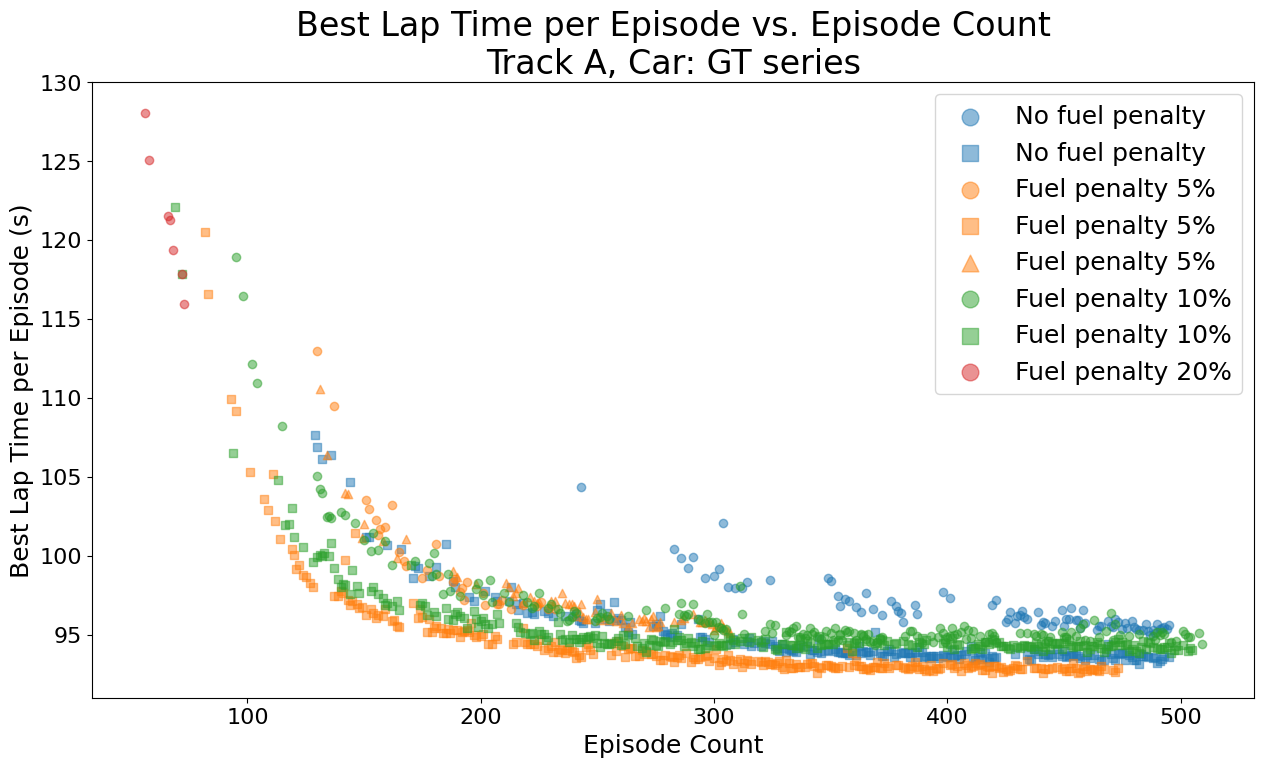

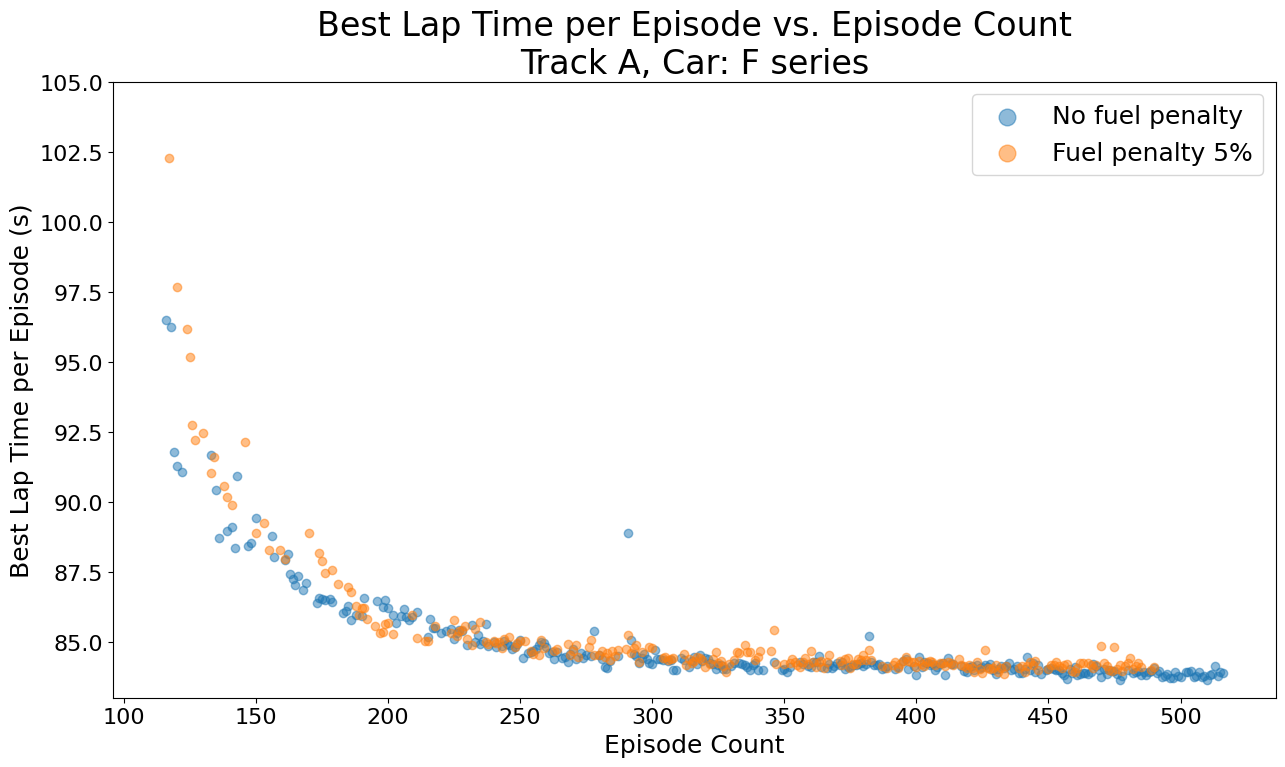

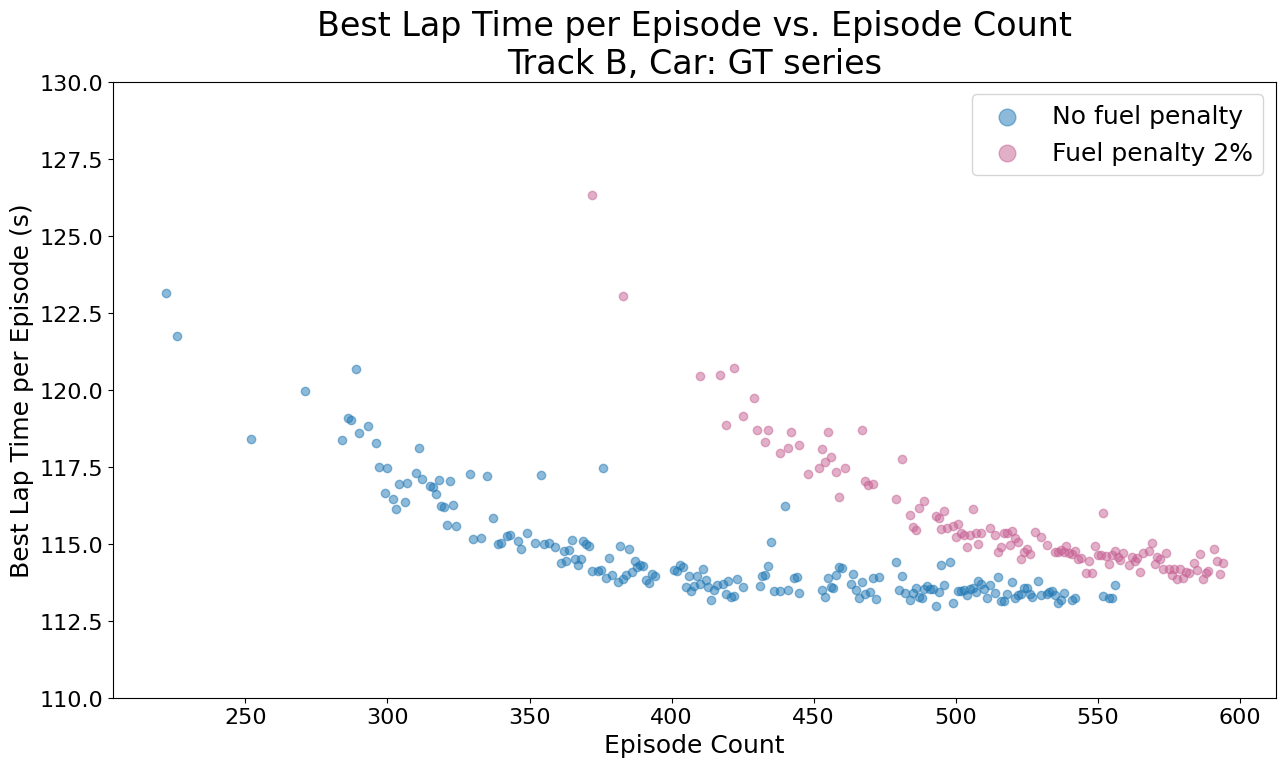

In [12]:
import re
import numpy as np

alpha = 0.5


def plot_episode_count_vs_best_lap_time_per_episode(
    ax, training_infos, track, car, top, bottom, plt_params, right=-1,
    y_label='Best Lap Time per Episode (s)', title='',
    alpha=0.5, sample_perc=1.0
):
    sorted_training_infos = dict(
        sorted(
            training_infos.items(),
            key=lambda item: extract_fuel_penalty(item[1]['reward_used'])
        )
    )

    for training_key, training_info in sorted_training_infos.items():
        combined_df = combine_sequences(training_info)

        # Downsample if sample_perc < 1.0
        if sample_perc < 1.0:
            combined_df = combined_df.sample(frac=sample_perc, random_state=42).sort_values('episode')

        lap_time_cols = [col for col in combined_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
        if not lap_time_cols:
            print(f"No lap time columns found in {training_key}")
            continue

        best_lap_times = combined_df[lap_time_cols].replace(0, np.nan).min(axis=1)

        ax.scatter(
            combined_df['episode'],
            best_lap_times,
            label=training_info['reward_used'],
            alpha=alpha,
            color=training_info['graph_color'],
            marker=training_info['graph_markers']
        )

    ax.set_xlabel('Episode Count', fontsize=plt_params['axes.labelsize'])
    ax.set_ylabel(y_label, fontsize=plt_params['axes.labelsize'])
    ax.set_title(f'{title}Track {track}, Car: {car}', fontsize=plt_params['axes.titlesize'])
    ax.set_ylim(top=top, bottom=bottom)
    if right != -1:
        ax.set_xlim(right=right)
    ax.tick_params(axis='x', labelsize=plt_params['ticks.labelsize'])
    ax.tick_params(axis='y', labelsize=plt_params['ticks.labelsize'])
    ax.legend(fontsize=plt_params['legend.fontsize'], markerscale=plt_params['legend.markerscale'], loc='upper right')


fig, ax1 = plt.subplots(figsize=(thesis_plt_params['figsize_x'], thesis_plt_params['figsize_y']))
fig, ax2 = plt.subplots(figsize=(thesis_plt_params['figsize_x'], thesis_plt_params['figsize_y']))
fig, ax3 = plt.subplots(figsize=(thesis_plt_params['figsize_x'], thesis_plt_params['figsize_y']))

plot_episode_count_vs_best_lap_time_per_episode(
    ax1, training_infos_redbull_gt3, 'A', 'GT series', top=130, bottom=91, plt_params=thesis_plt_params,
    title='Best Lap Time per Episode vs. Episode Count\n'
)

plot_episode_count_vs_best_lap_time_per_episode(
    ax2, training_infos_redbull_f317, 'A', 'F series', top=105, bottom=83, plt_params=thesis_plt_params,
    title='Best Lap Time per Episode vs. Episode Count\n'
)

plot_episode_count_vs_best_lap_time_per_episode(
    ax3, training_infos_monza_gt3, 'B', 'GT series', top=130, bottom=110, plt_params=thesis_plt_params,
    title='Best Lap Time per Episode vs. Episode Count\n'
)

No lap time columns found in redbull_gt3_baseline_policy


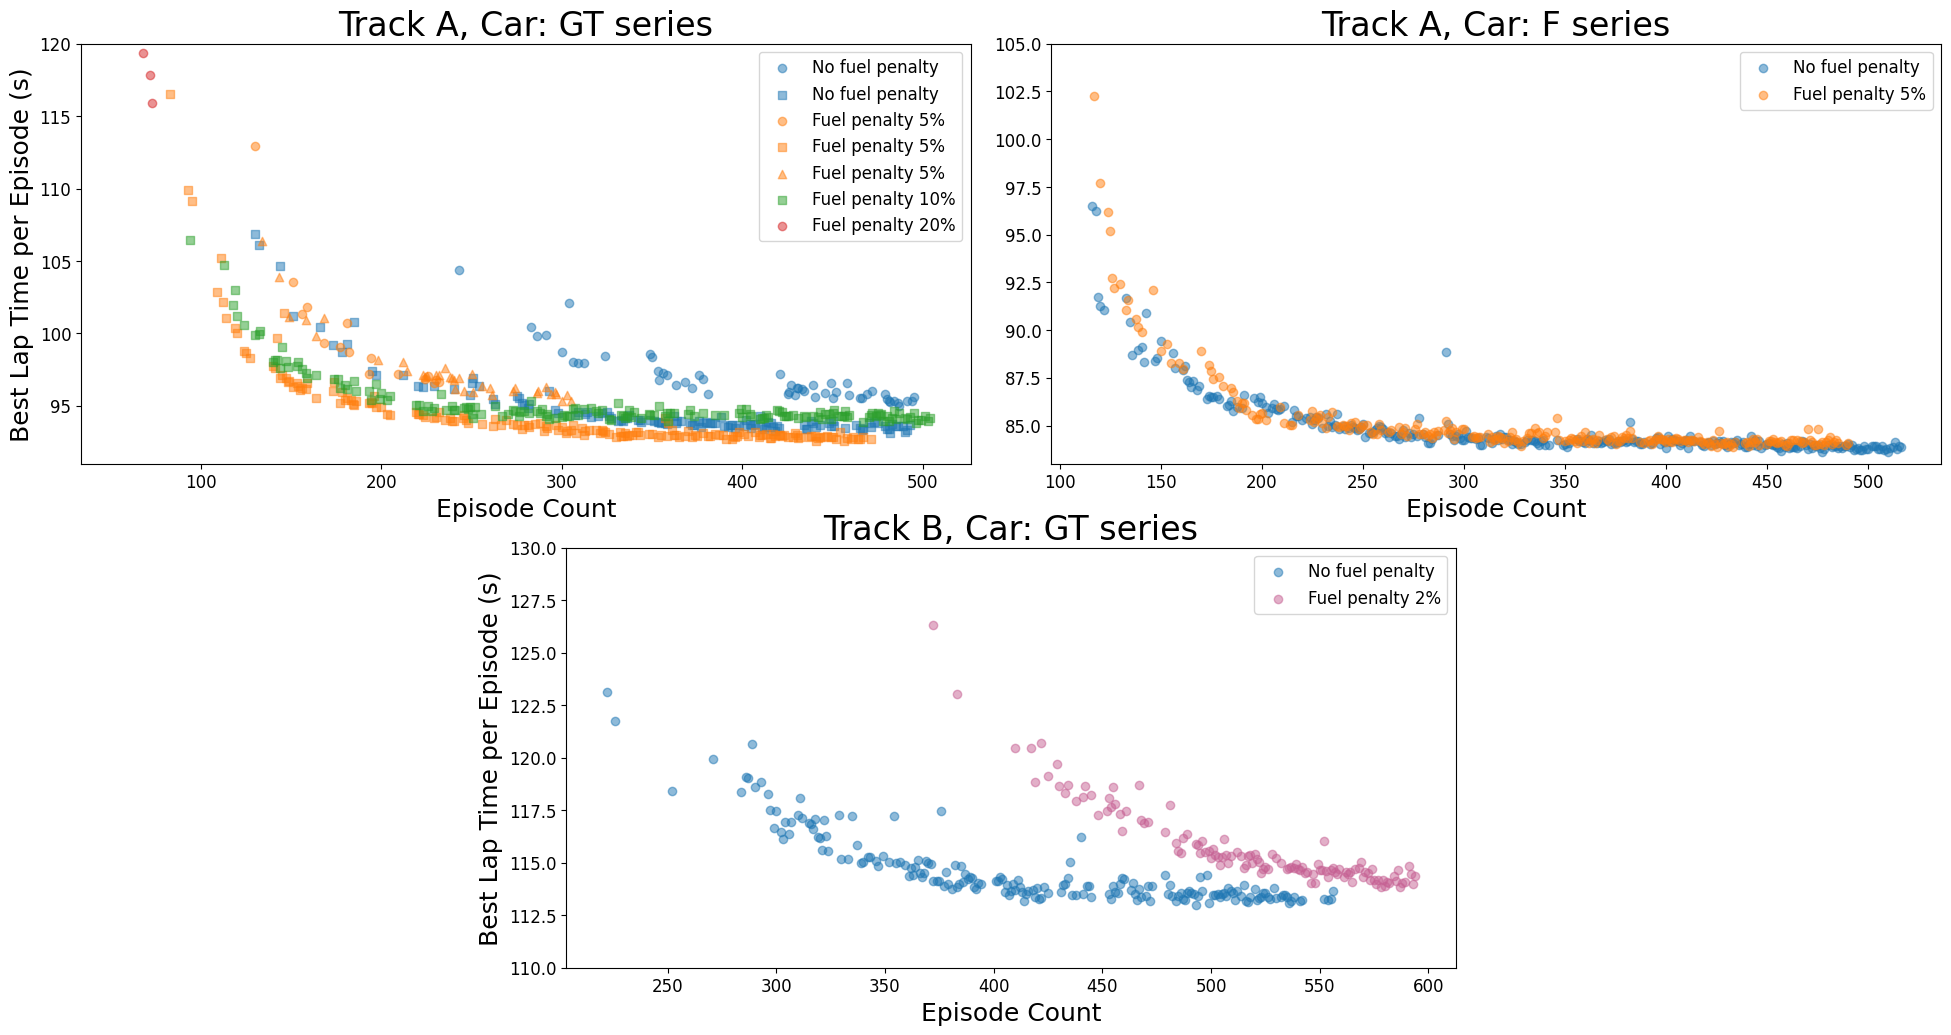

In [13]:
fig = plt.figure(figsize=(presentation_plt_params['figsize_x'], presentation_plt_params['figsize_y']))
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:])
ax3 = fig.add_subplot(gs[1, 1:3])

plot_episode_count_vs_best_lap_time_per_episode(
    ax1, {k: v for k, v in training_infos_redbull_gt3.items() if k != 'redbull_gt3_2903_fuel_10p'}, 'A', 'GT series', top=120, bottom=91, plt_params=presentation_plt_params, alpha=0.5, sample_perc=0.6
)

plot_episode_count_vs_best_lap_time_per_episode(
    ax2, training_infos_redbull_f317, 'A', 'F series', top=105, bottom=83, plt_params=presentation_plt_params, y_label='', alpha=0.5
)

plot_episode_count_vs_best_lap_time_per_episode(
    ax3, training_infos_monza_gt3, 'B', 'GT series', top=130, bottom=110, plt_params=presentation_plt_params, alpha=0.5
)

this graph is another illustration of the learning curve of the training. you can again see that when we add the fuel penalty coefficient, we're able to train faster. But when the penalty is too high, we won't progress far

# Best Fuel Consumption Curves

## Scatter Plot: Episode Count - Best Fuel Consumption Per Lap

No BestLapFuel column found in redbull_gt3_baseline_policy


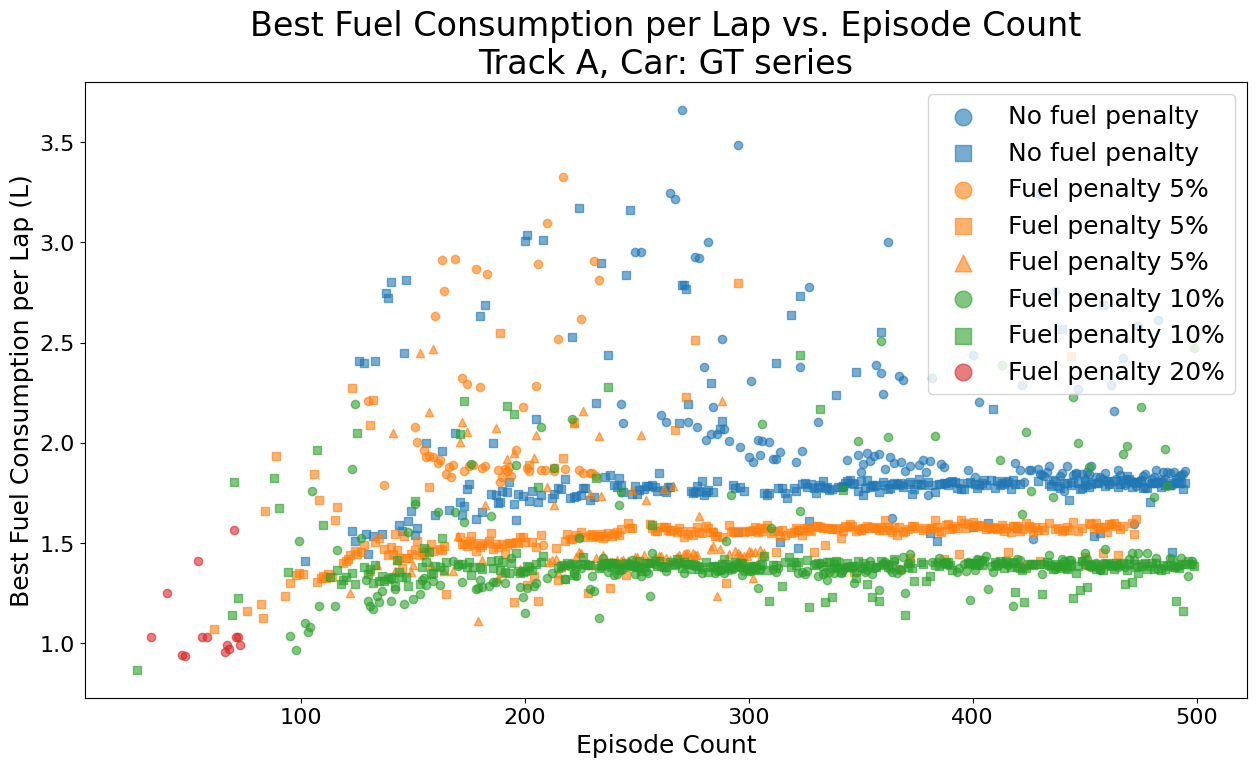

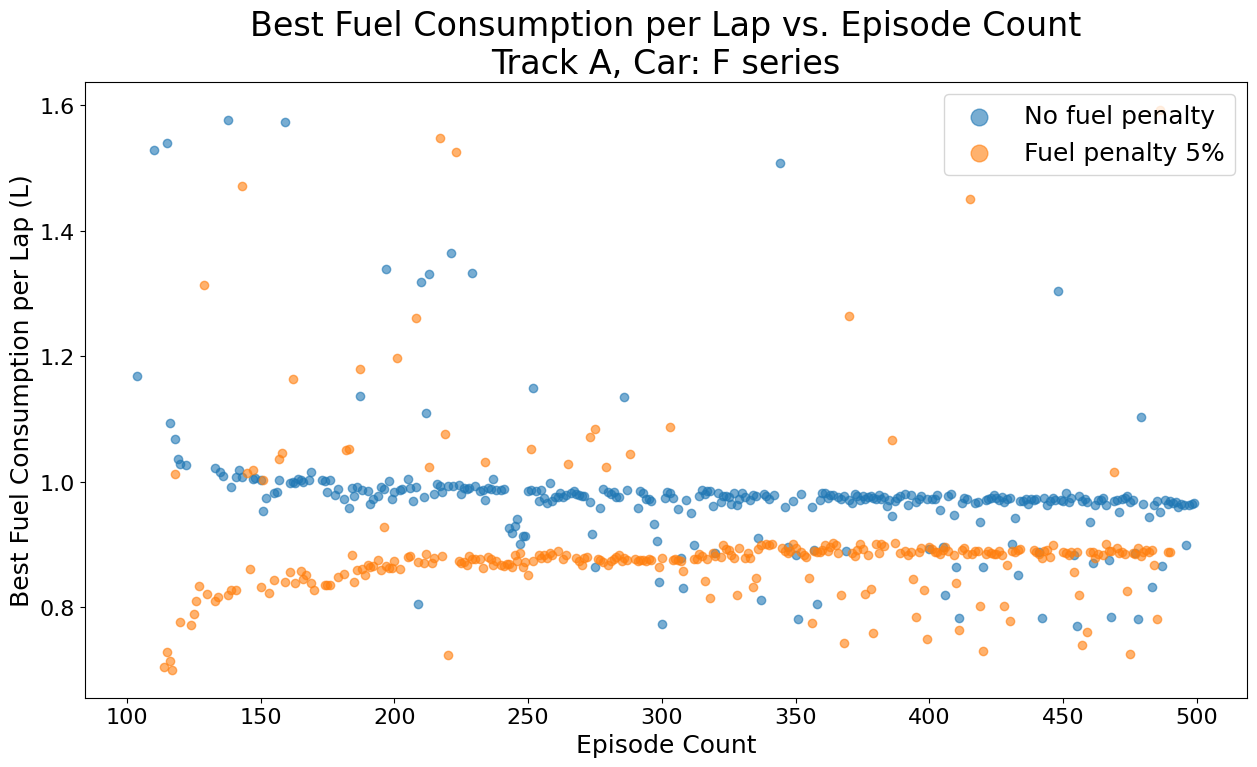

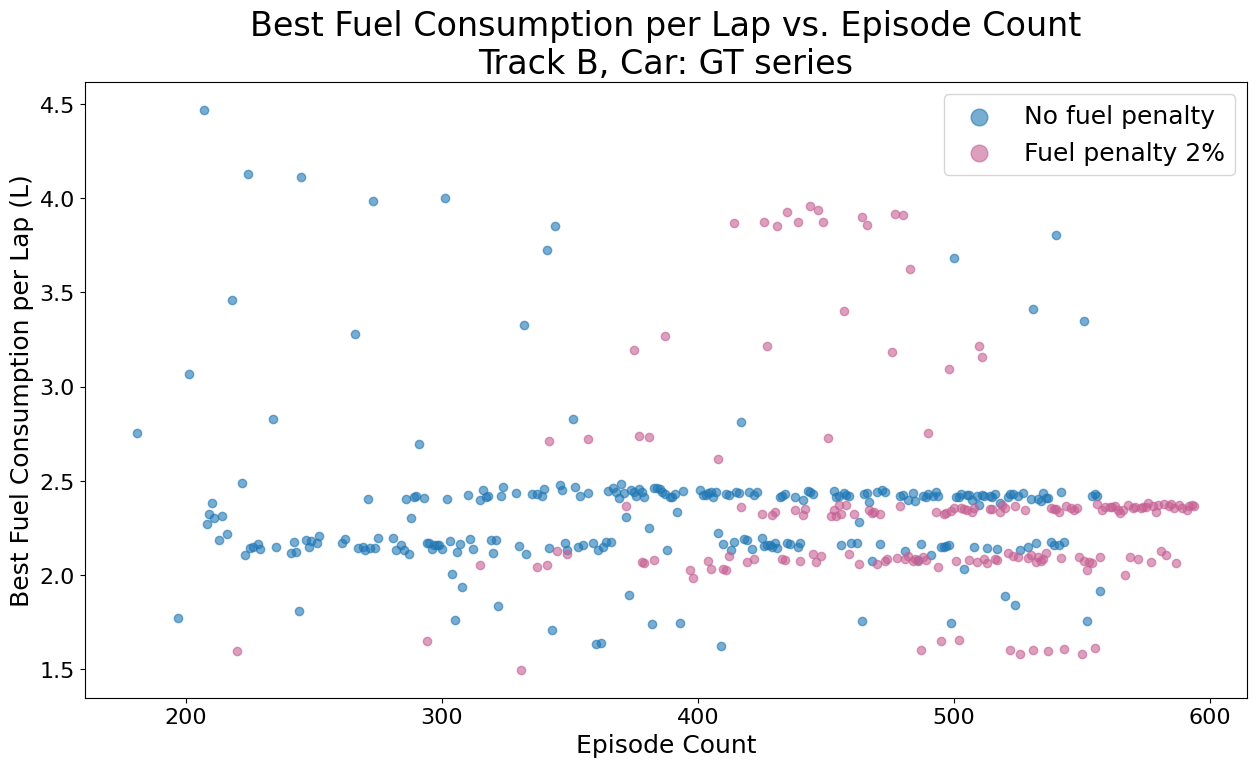

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [14]:
def plot_episode_count_vs_best_fuel_consumption_per_lap(ax, training_infos, track, car, episode_limit, plt_params, y_label='Best Fuel Consumption per Lap (L)', title=''):
    plt.figure(figsize=(12, 8))
    sorted_training_infos = dict(
        sorted(
            training_infos.items(),
            key=lambda item: extract_fuel_penalty(item[1]['reward_used'])
        )
    )
    for training_key, training_info in sorted_training_infos.items():
        df = combine_sequences(training_info)

        if 'BestLapFuel' not in df.columns:
            print(f'No BestLapFuel column found in {training_key}')
            continue

        filtered_df = df[(df['BestLapFuel'] > 0) & (df['episode'] < episode_limit)]
        ax.scatter(filtered_df['episode'], list(map(lambda x: x * 10, filtered_df['BestLapFuel'])), label=training_info['reward_used'], alpha=0.6, color=training_info['graph_color'], marker=training_info['graph_markers'])

    ax.set_xlabel('Episode Count', fontsize=plt_params['axes.labelsize'])
    ax.set_ylabel(y_label, fontsize=plt_params['axes.labelsize'])
    ax.set_title(f'{title}Track {track}, Car: {car}', fontsize=plt_params['axes.titlesize'])
    ax.tick_params(axis='x', labelsize=plt_params['ticks.labelsize'])
    ax.tick_params(axis='y', labelsize=plt_params['ticks.labelsize'])
    ax.legend(fontsize=plt_params['legend.fontsize'], markerscale=plt_params['legend.markerscale'], loc='upper right')


fig, ax1 = plt.subplots(figsize=(thesis_plt_params['figsize_x'], thesis_plt_params['figsize_y']))
fig, ax2 = plt.subplots(figsize=(thesis_plt_params['figsize_x'], thesis_plt_params['figsize_y']))
fig, ax3 = plt.subplots(figsize=(thesis_plt_params['figsize_x'], thesis_plt_params['figsize_y']))


plot_episode_count_vs_best_fuel_consumption_per_lap(ax1, training_infos_redbull_gt3, 'A', 'GT series', episode_limit=500, plt_params=thesis_plt_params, title='Best Fuel Consumption per Lap vs. Episode Count\n')
plot_episode_count_vs_best_fuel_consumption_per_lap(ax2, training_infos_redbull_f317, 'A', 'F series', episode_limit=500, plt_params=thesis_plt_params, title='Best Fuel Consumption per Lap vs. Episode Count\n')
plot_episode_count_vs_best_fuel_consumption_per_lap(ax3, training_infos_monza_gt3, 'B', 'GT series', episode_limit=700, plt_params=thesis_plt_params, title='Best Fuel Consumption per Lap vs. Episode Count\n')

# selected_keys = ['0504_monza_gt3_seed_2']
# {k: v for k, v in training_infos_monza_gt3.items() if k in selected_keys} 

No BestLapFuel column found in redbull_gt3_baseline_policy


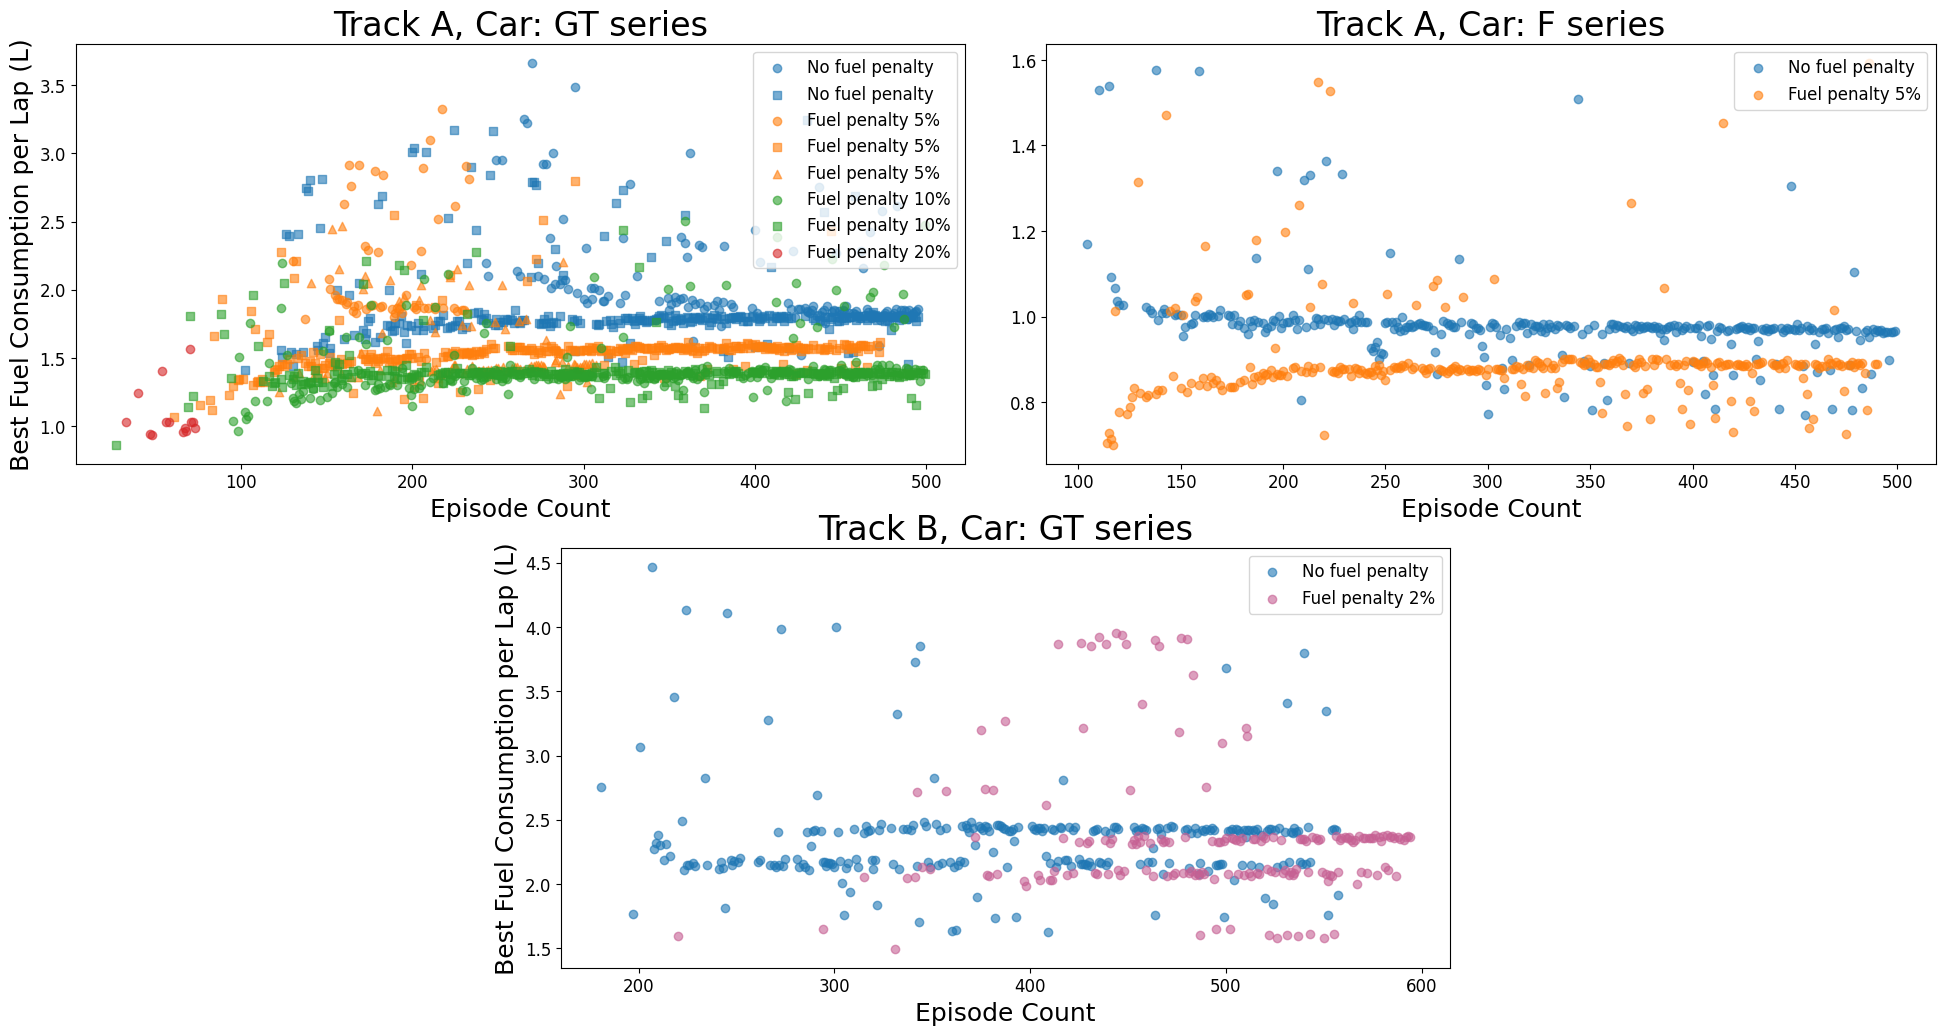

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [15]:

fig = plt.figure(figsize=(presentation_plt_params['figsize_x'], presentation_plt_params['figsize_y']))
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:])
ax3 = fig.add_subplot(gs[1, 1:3])

plot_episode_count_vs_best_fuel_consumption_per_lap(ax1, training_infos_redbull_gt3, 'A', 'GT series', episode_limit=500, plt_params=presentation_plt_params)
plot_episode_count_vs_best_fuel_consumption_per_lap(ax2, training_infos_redbull_f317, 'A', 'F series', episode_limit=500, plt_params=presentation_plt_params, y_label='')
plot_episode_count_vs_best_fuel_consumption_per_lap(ax3, training_infos_monza_gt3, 'B', 'GT series', episode_limit=700, plt_params=presentation_plt_params)

Todo: the model trains faster and saves more fuel. But when the penalty is set too high, the model focuses too much on optimizing its fuel efficiency and doesn't improve much over time

TODO: I can also add a weighted average to this plot

# Scatter plot: Lap Time - Fuel Used

It looks like there's three separate lines that are located at a double rate from each other. (1x, 2x, 3x). As if they represent how many laps were completed (1 lap, 2 laps, 3 laps), which shouldn't be possible

processing redbull_gt3_1703
processing redbull_gt3_2803
processing redbull_gt3_baseline_policy
No Lap Indices found in redbull_gt3_baseline_policy
processing redbull_gt3_1803_fuel_5p
processing redbull_gt3_2503_fuel_5p
processing redbull_gt3_2603_fuel_5p
processing redbull_gt3_2903_fuel_10p
processing redbull_gt3_3003_fuel_10p
processing redbull_gt3_2903_fuel_20p
processing 0423_redbull_f317_seed_0
processing 0426_redbull_f317_fuel_5p_seed_0
processing 0504_monza_gt3_seed_2
processing 0501_monza_gt3_fuel_2p_seed_0


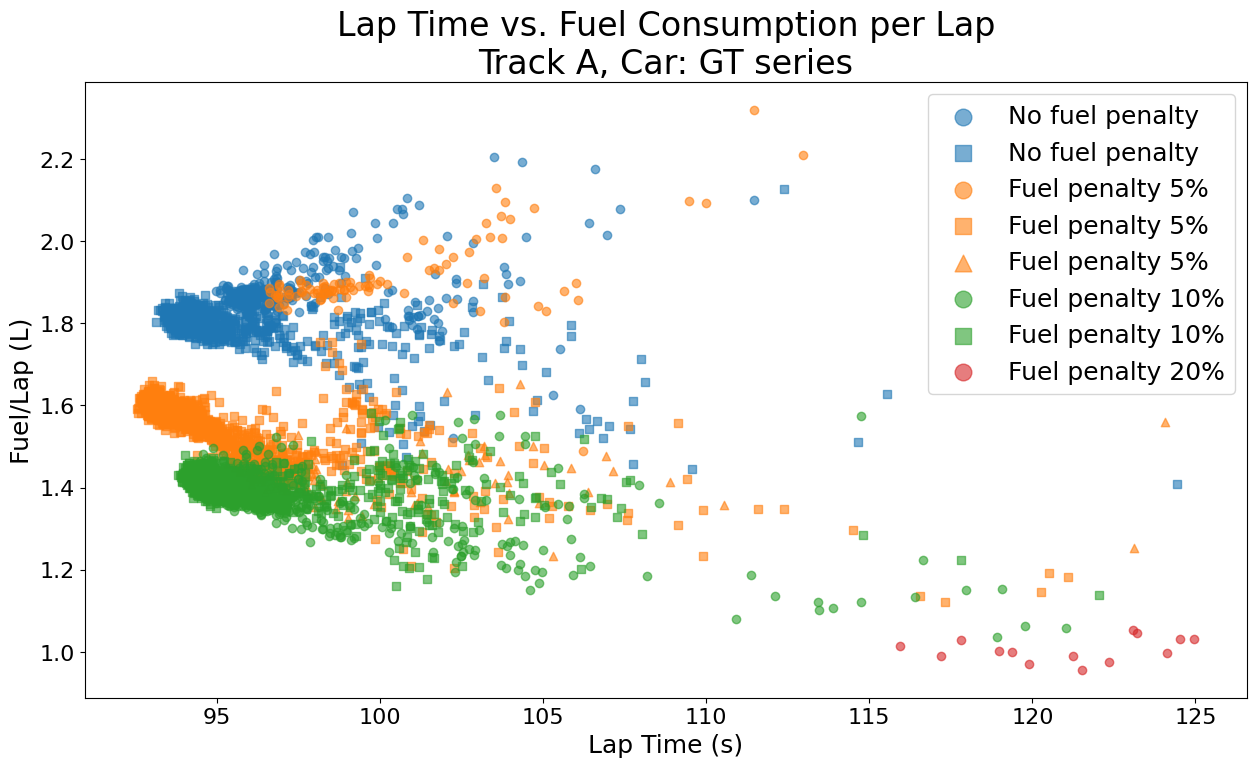

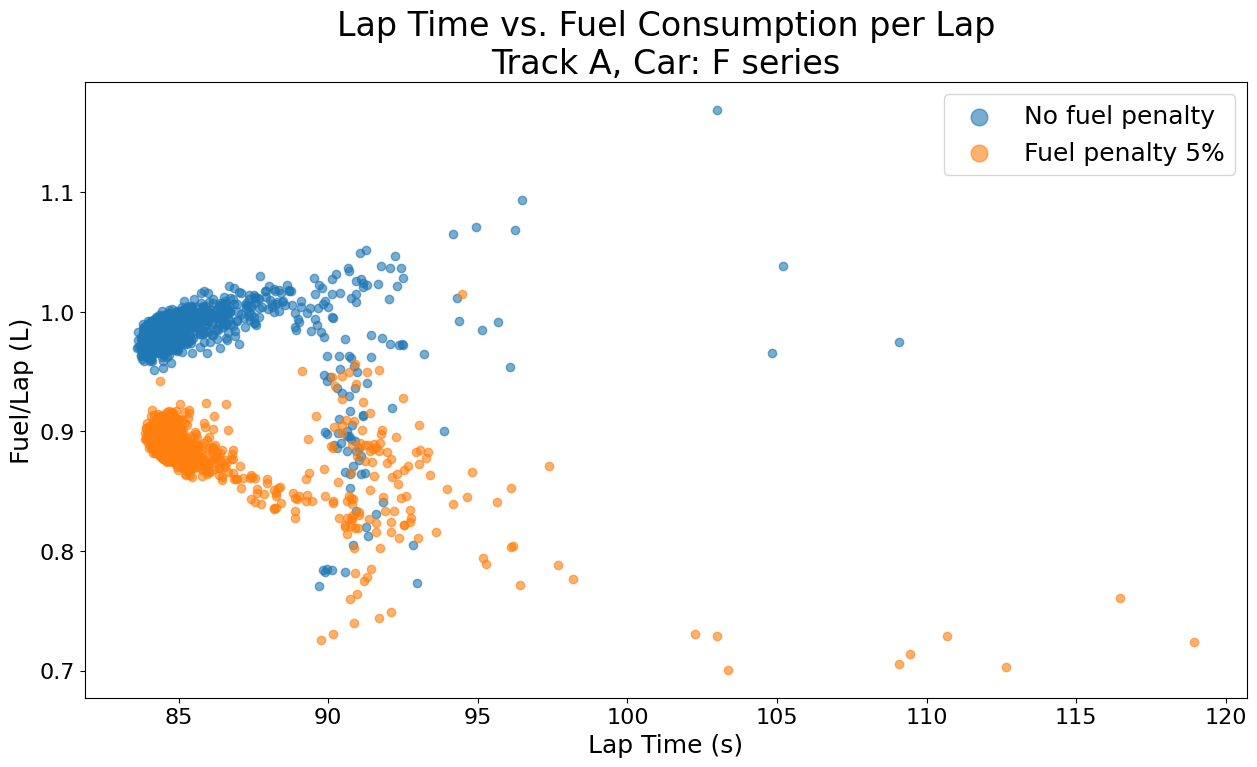

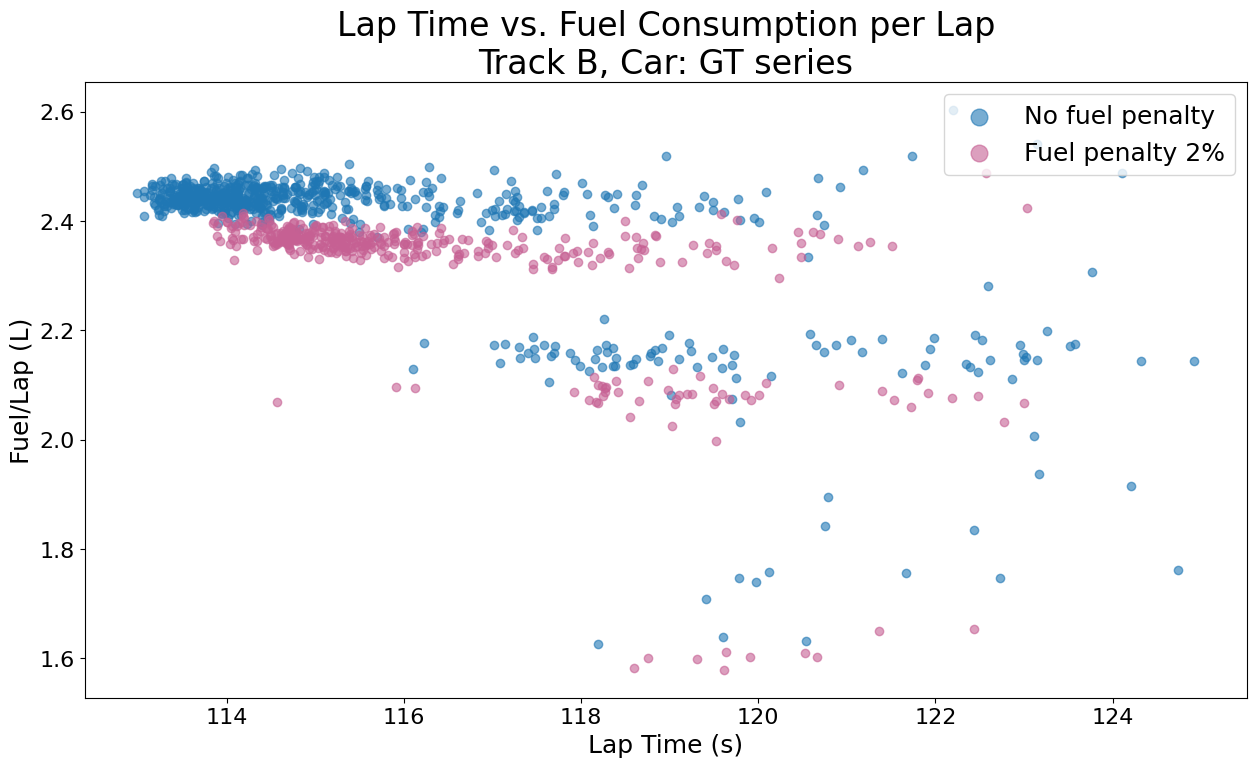

In [16]:
import re

def plot_lap_time_vs_fuel_used(ax, training_infos, track, car, plt_params, max_lap_time=np.inf, max_lap_fuel=np.inf, y_label='', title=''):
    sorted_training_infos = dict(
        sorted(
            training_infos.items(),
            key=lambda item: extract_fuel_penalty(item[1]['reward_used'])
        )
    )
    for training_key, training_info in sorted_training_infos.items():
        print(f'processing {training_key}')
        summary_df = combine_sequences(training_info)

        lap_indices = {
            int(match.group(1)) for col in summary_df.columns
            if (match := re.match(r'LapNo_(\d+)_Time', col))
        }

        if not lap_indices:
            print(f'No Lap Indices found in {training_key}')
            continue

        all_times = []
        all_fuels = []

        for i in sorted(lap_indices):
            time_col = f'LapNo_{i}_Time'
            fuel_col = f'LapNo_{i}_Fuel'

            if time_col in summary_df.columns and fuel_col in summary_df.columns:
                mask = (summary_df[time_col] <= max_lap_time) & (summary_df[fuel_col] <= max_lap_fuel)
                all_times.extend(summary_df.loc[mask, time_col])
                all_fuels.extend(summary_df.loc[mask, fuel_col])

        ax.scatter(
            all_times,
            list(map(lambda x: x * 10, all_fuels)),
            label=training_info['reward_used'],
            alpha=0.6,
            color=training_info['graph_color'],
            marker=training_info['graph_markers']
        )

    ax.set_xlabel('Lap Time (s)', fontsize=plt_params['axes.labelsize'])
    ax.set_ylabel(y_label, fontsize=plt_params['axes.labelsize'])
    ax.set_title(f'{title}Track {track}, Car: {car}', fontsize=plt_params['axes.titlesize'])
    ax.tick_params(axis='x', labelsize=plt_params['ticks.labelsize'])
    ax.tick_params(axis='y', labelsize=plt_params['ticks.labelsize'])
    ax.legend(fontsize=plt_params['legend.fontsize'], markerscale=plt_params['legend.markerscale'], loc='upper right')

fig, ax1 = plt.subplots(figsize=(thesis_plt_params['figsize_x'], thesis_plt_params['figsize_y']))
fig, ax2 = plt.subplots(figsize=(thesis_plt_params['figsize_x'], thesis_plt_params['figsize_y']))
fig, ax3 = plt.subplots(figsize=(thesis_plt_params['figsize_x'], thesis_plt_params['figsize_y']))

plot_lap_time_vs_fuel_used(ax1, training_infos_redbull_gt3, 'A', 'GT series', thesis_plt_params, 125,  y_label='Fuel/Lap (L)', title='Lap Time vs. Fuel Consumption per Lap\n')
plot_lap_time_vs_fuel_used(ax2, training_infos_redbull_f317, 'A', 'F series', thesis_plt_params, 125,  y_label='Fuel/Lap (L)', title='Lap Time vs. Fuel Consumption per Lap\n')
plot_lap_time_vs_fuel_used(ax3, training_infos_monza_gt3, 'B', 'GT series', thesis_plt_params, 125, 0.3,  y_label='Fuel/Lap (L)', title='Lap Time vs. Fuel Consumption per Lap\n')

processing redbull_gt3_1703
processing redbull_gt3_2803
processing redbull_gt3_baseline_policy
No Lap Indices found in redbull_gt3_baseline_policy
processing redbull_gt3_1803_fuel_5p
processing redbull_gt3_2503_fuel_5p
processing redbull_gt3_2603_fuel_5p
processing redbull_gt3_2903_fuel_10p
processing redbull_gt3_3003_fuel_10p
processing redbull_gt3_2903_fuel_20p
processing 0423_redbull_f317_seed_0
processing 0426_redbull_f317_fuel_5p_seed_0
processing 0504_monza_gt3_seed_2
processing 0501_monza_gt3_fuel_2p_seed_0


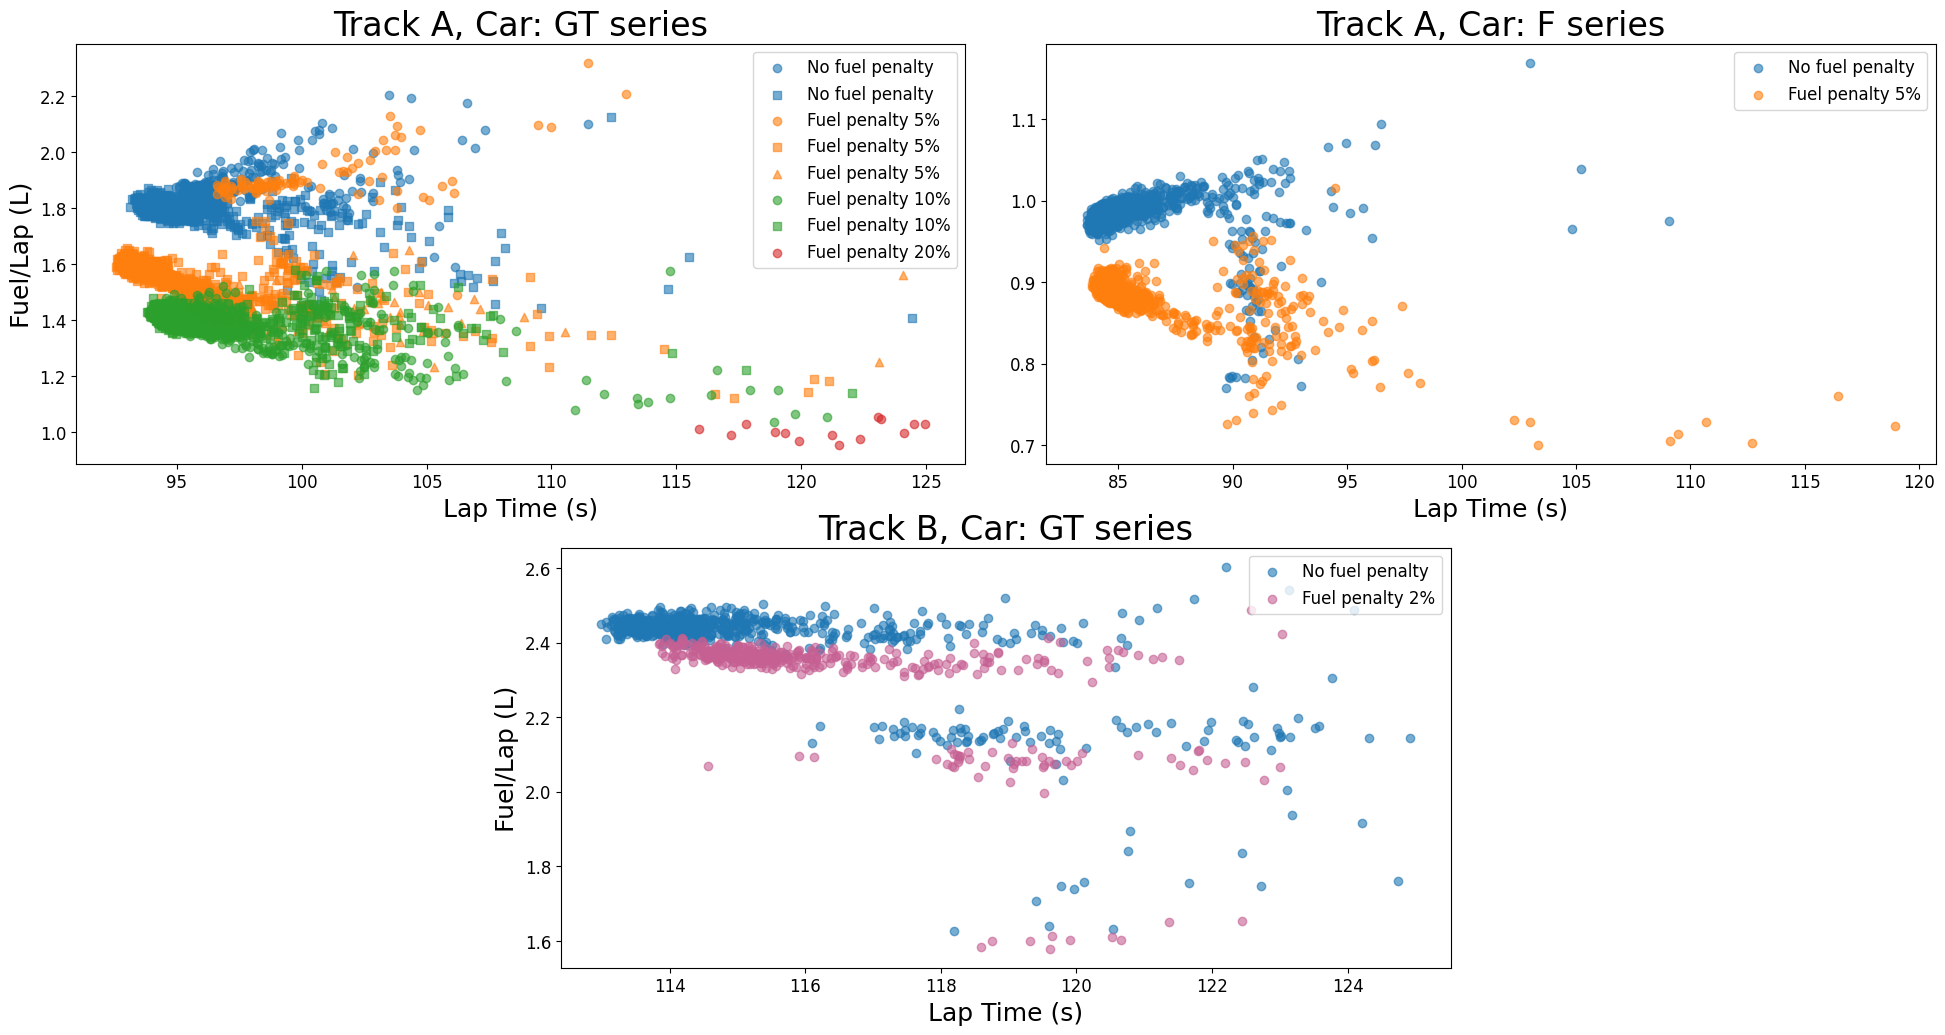

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import re



fig = plt.figure(figsize=(presentation_plt_params['figsize_x'], presentation_plt_params['figsize_y']))
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:])
ax3 = fig.add_subplot(gs[1, 1:3])


plot_lap_time_vs_fuel_used(ax1, training_infos_redbull_gt3, 'A', 'GT series', presentation_plt_params, 125, y_label='Fuel/Lap (L)')
plot_lap_time_vs_fuel_used(ax2, training_infos_redbull_f317, 'A', 'F series', presentation_plt_params, 125)
plot_lap_time_vs_fuel_used(ax3, training_infos_monza_gt3, 'B', 'GT series', presentation_plt_params, 125, 0.3, y_label='Fuel/Lap (L)')

plt.show()


### Box-and-whisker plot of fuel consumption for different reward functions

processing redbull_gt3_1703
processing redbull_gt3_2803
processing redbull_gt3_baseline_policy
No Lap Indices found in redbull_gt3_baseline_policy
processing redbull_gt3_1803_fuel_5p
processing redbull_gt3_2503_fuel_5p
processing redbull_gt3_2603_fuel_5p
processing redbull_gt3_2903_fuel_10p
processing redbull_gt3_3003_fuel_10p
processing redbull_gt3_2903_fuel_20p


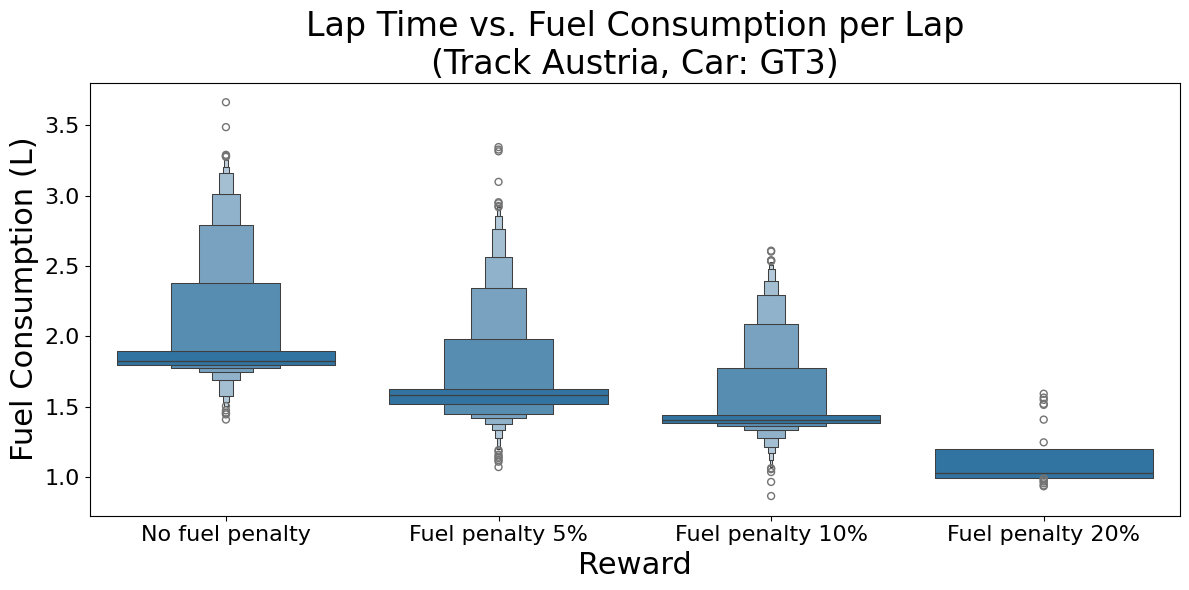

+------------------+---------+---------+----------+----------+----------+----------+---------+---------+-----------+
| Reward           |   Count |    Mean |      Std |      Min |       Q1 |   Median |      Q3 |     Max |       IQR |
|------------------+---------+---------+----------+----------+----------+----------+---------+---------+-----------|
| Fuel penalty 10% |    2334 | 1.49823 | 0.26015  | 0.866013 | 1.38571  |  1.40887 | 1.44009 | 2.60859 | 0.0543785 |
| Fuel penalty 20% |      26 | 1.13236 | 0.228184 | 0.935345 | 0.991278 |  1.02879 | 1.19884 | 1.59269 | 0.207567  |
| Fuel penalty 5%  |    1949 | 1.67619 | 0.312633 | 1.0718   | 1.51993  |  1.58489 | 1.62733 | 3.34429 | 0.107403  |
| No fuel penalty  |    1523 | 1.96472 | 0.354145 | 1.40928  | 1.79753  |  1.82348 | 1.89659 | 3.66293 | 0.0990582 |
+------------------+---------+---------+----------+----------+----------+----------+---------+---------+-----------+
processing 0423_redbull_f317_seed_0
processing 0426_redbull_f317

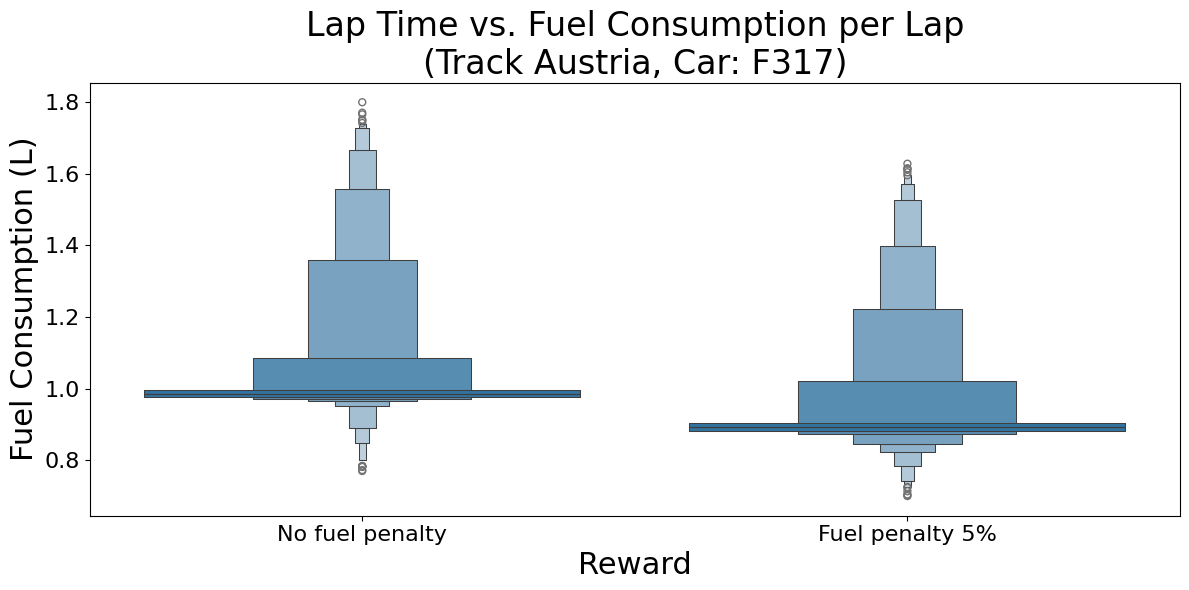

+-----------------+---------+----------+----------+----------+----------+----------+----------+---------+-----------+
| Reward          |   Count |     Mean |      Std |      Min |       Q1 |   Median |       Q3 |     Max |       IQR |
|-----------------+---------+----------+----------+----------+----------+----------+----------+---------+-----------|
| Fuel penalty 5% |    1360 | 0.932523 | 0.141712 | 0.700703 | 0.88285  | 0.893259 | 0.903206 | 1.62756 | 0.0203562 |
| No fuel penalty |    1749 | 1.03269  | 0.155927 | 0.770493 | 0.976601 | 0.984173 | 0.996132 | 1.79909 | 0.0195312 |
+-----------------+---------+----------+----------+----------+----------+----------+----------+---------+-----------+
processing 0504_monza_gt3_seed_2
processing 0501_monza_gt3_fuel_2p_seed_0


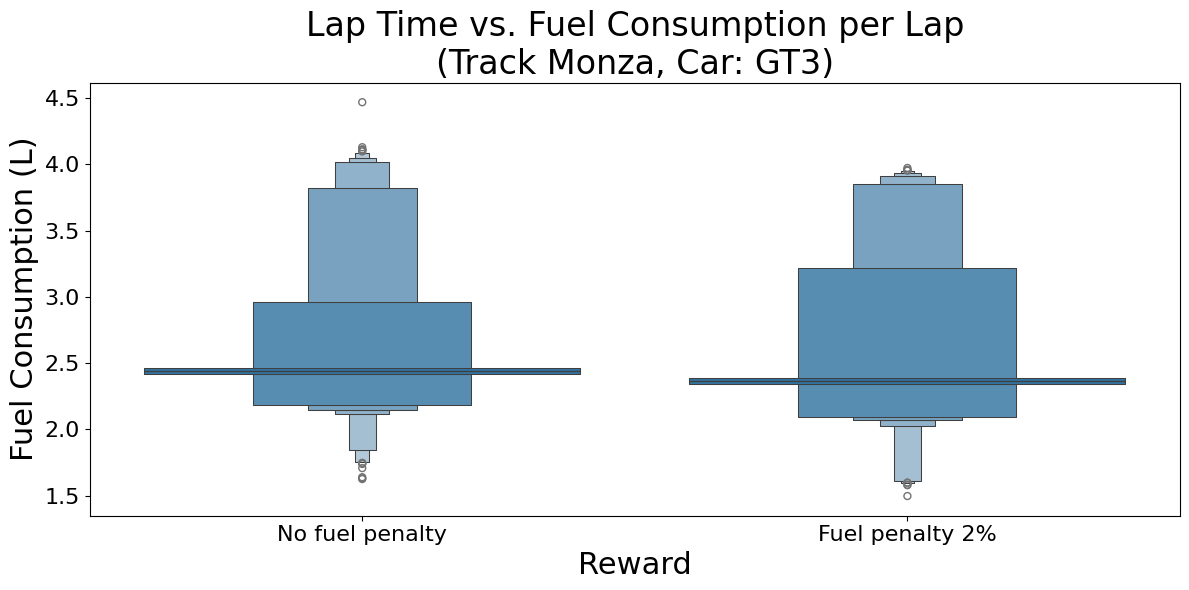

+-----------------+---------+---------+----------+---------+---------+----------+---------+---------+-----------+
| Reward          |   Count |    Mean |      Std |     Min |      Q1 |   Median |      Q3 |     Max |       IQR |
|-----------------+---------+---------+----------+---------+---------+----------+---------+---------+-----------|
| Fuel penalty 2% |     520 | 2.51584 | 0.516811 | 1.49752 | 2.34162 |  2.36471 | 2.39109 | 3.9728  | 0.0494719 |
| No fuel penalty |     836 | 2.56328 | 0.477738 | 1.62563 | 2.41793 |  2.44251 | 2.46614 | 4.46867 | 0.0482082 |
+-----------------+---------+---------+----------+---------+---------+----------+---------+---------+-----------+


In [18]:
def boxplot_fuel_consumption(training_infos, track, car, max_lap_time = np.inf, max_lap_fuel = np.inf):
    records = []
    sorted_training_infos = dict(
        sorted(
            training_infos.items(),
            key=lambda item: extract_fuel_penalty(item[1]['reward_used'])
        )
    )
    for training_key, training_info in sorted_training_infos.items():
        print(f'processing {training_key}')
        summary_df = combine_sequences(training_info)

        # Find all unique lap indices i by searching for columns like 'Lap_{i}_Time'
        lap_indices = set()
        for col in summary_df.columns:
            match = re.match(r'LapNo_(\d+)_Time', col)
            if match:
                lap_indices.add(int(match.group(1)))

        if not lap_indices:
            print(f'No Lap Indices found in {training_key}')
            continue

        reward_label = training_info['reward_used']

        for i in sorted(lap_indices):
            fuel_col = f'LapNo_{i}_Fuel'
            if fuel_col in summary_df.columns:
                fuels = summary_df[fuel_col].dropna().tolist()
                records.extend([{
                    "Reward": reward_label,
                    "Fuel Consumption (L)": f * 10
                } for f in fuels])
    
    if not records:
        print("No fuel data available.")
        return

    df = pd.DataFrame(records)

    # Plot with seaborn
    plt.figure(figsize=(12, 6))
    sns.boxenplot(data=df, x="Reward", y="Fuel Consumption (L)")
    plt.title(f'Lap Time vs. Fuel Consumption per Lap\n(Track {track}, Car: {car})')
    plt.tight_layout()
    plt.show()

    summary = df.groupby("Reward")["Fuel Consumption (L)"].agg(
        Count='count',
        Mean='mean',
        Std='std',
        Min='min',
        Q1=lambda x: x.quantile(0.25),
        Median='median',
        Q3=lambda x: x.quantile(0.75),
        Max='max',
    )
    summary["IQR"] = summary["Q3"] - summary["Q1"]
    print(tabulate(summary, headers='keys', tablefmt='psql'))


boxplot_fuel_consumption(training_infos_redbull_gt3, 'Austria', 'GT3')
boxplot_fuel_consumption(training_infos_redbull_f317,'Austria', 'F317')
boxplot_fuel_consumption(training_infos_monza_gt3, 'Monza', 'GT3')

# Reward function over time (weighted average)

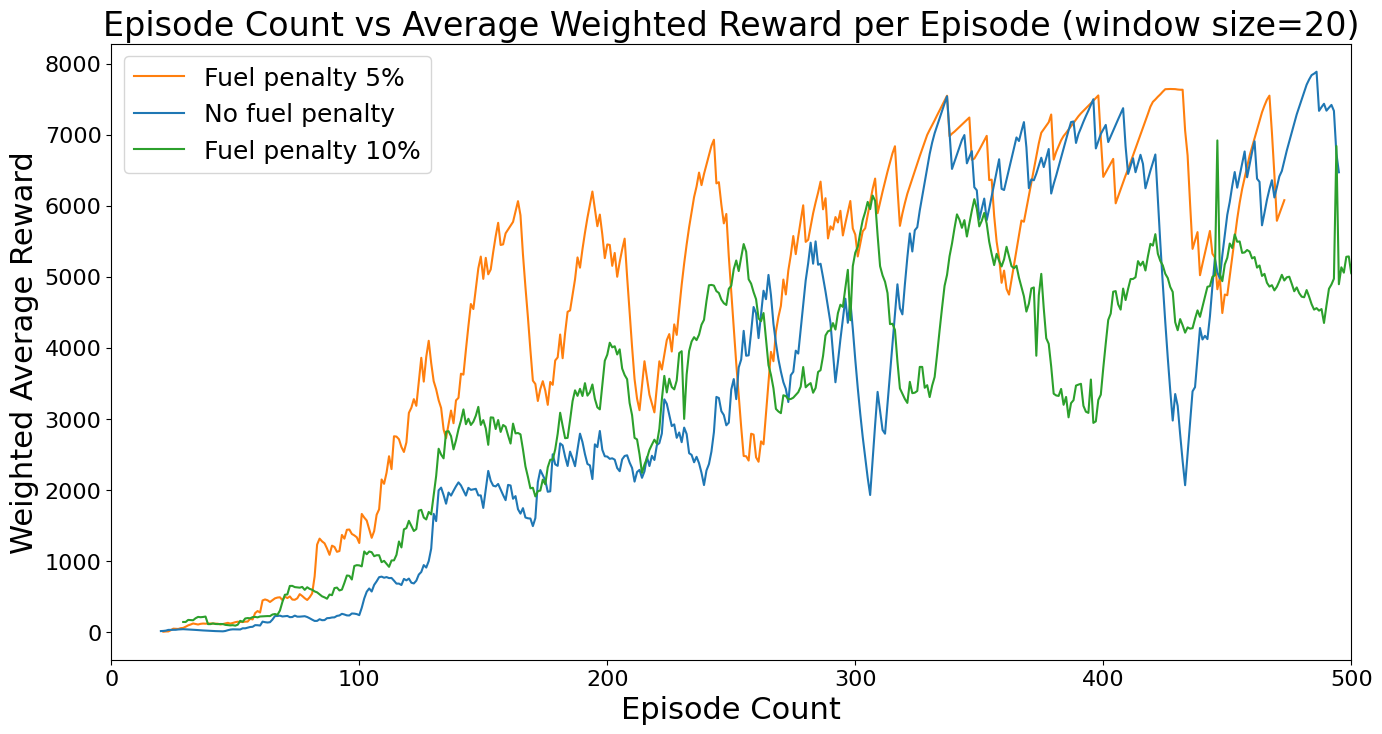

In [19]:
from collections import defaultdict
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 8))

window_size = 20

reward_grouped_data = defaultdict(list)
reward_group_colors = {}

# ignore_keys = ['redbull_gt3_baseline_policy']
include_keys = ['redbull_gt3_2503_fuel_5p', 'redbull_gt3_2803', 'redbull_gt3_2903_fuel_10p', 'redbull_gt3_3003_fuel_10p', 'redbull_gt3_2503']
for training_key, training_info in training_infos_redbull_gt3.items():
    # if training_key in ignore_keys:
    #     continue

    if training_key not in include_keys:
        continue
    
    df = combine_sequences(training_info)
    combined_df = df[(df['ep_reward'] > 0)]

    # Use a simple weighted rolling average (linear weights)
    weights = np.arange(1, window_size + 1)
    weighted_avg = (
        combined_df['ep_reward']
        .rolling(window_size)
        .apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)
    )

    episode_series = combined_df['episode'].reset_index(drop=True)
    weighted_series = pd.Series(weighted_avg.values, index=episode_series)
    weighted_series = weighted_series.interpolate(method='linear')

    reward_category = training_info['reward_used']
    reward_grouped_data[reward_category].append(weighted_series)


     # Save one color per reward category
    if reward_category not in reward_group_colors:
        reward_group_colors[reward_category] = training_info['graph_color']

    # plt.plot(
    #     combined_df['episode'],
    #     weighted_avg,
    #     label=training_key,
    #     color=training_info['graph_color']
    # )

for reward_used, series_list in reward_grouped_data.items():
    # Merge series on episode index
    merged_df = pd.concat(series_list, axis=1)
    merged_df.to_csv(f'{reward_used}_merged_df.csv')

    #mean_series = merged_df.where(~merged_df.isnull().any(axis=1)).mean(axis=1)
    
    mean_series = merged_df.mean(axis=1)
    mean_series.to_csv(f'{reward_used}_mean_series')
    mean_series = mean_series.sort_index()
    
    #color = reward_group_colors[reward_used]
    color = reward_group_colors[reward_used]
    
    plt.plot(mean_series.index, mean_series.values, label=f'{reward_used}', color=color)
    #plt.plot(range(min_length), average_curve, label=f'reward: {reward_used}', color=reward_group_colors[reward_used])

plt.title(f'Episode Count vs Average Weighted Reward per Episode (window size={window_size})')
plt.xlabel('Episode Count')
plt.ylabel('Weighted Average Reward')
plt.legend()
plt.xlim(right=500, left=0)
plt.show()


The 20% fuel penalty model gets stuck in a local minimum trying too hard to optimize its fuel consumption (this can also be seen on the scatter plot that plots Best Fuel Consumption Rate over Episode Count)

the graphs that drop:

- redbull_gt3_1703 (constant steer angle problem)
- redbull_gt3_1803_fuel_5p (dropped because of -20000 reward function)
- redbull_gt3_2503_fuel_5p (constant steer angle problem)
- redbull_gt3_2903_fuel_20p (dropped because fuel consumption penalty too high)

## Correlation between Best Lap Time Per Episode and Episode Reward

No lap time columns found in redbull_gt3_baseline_policy


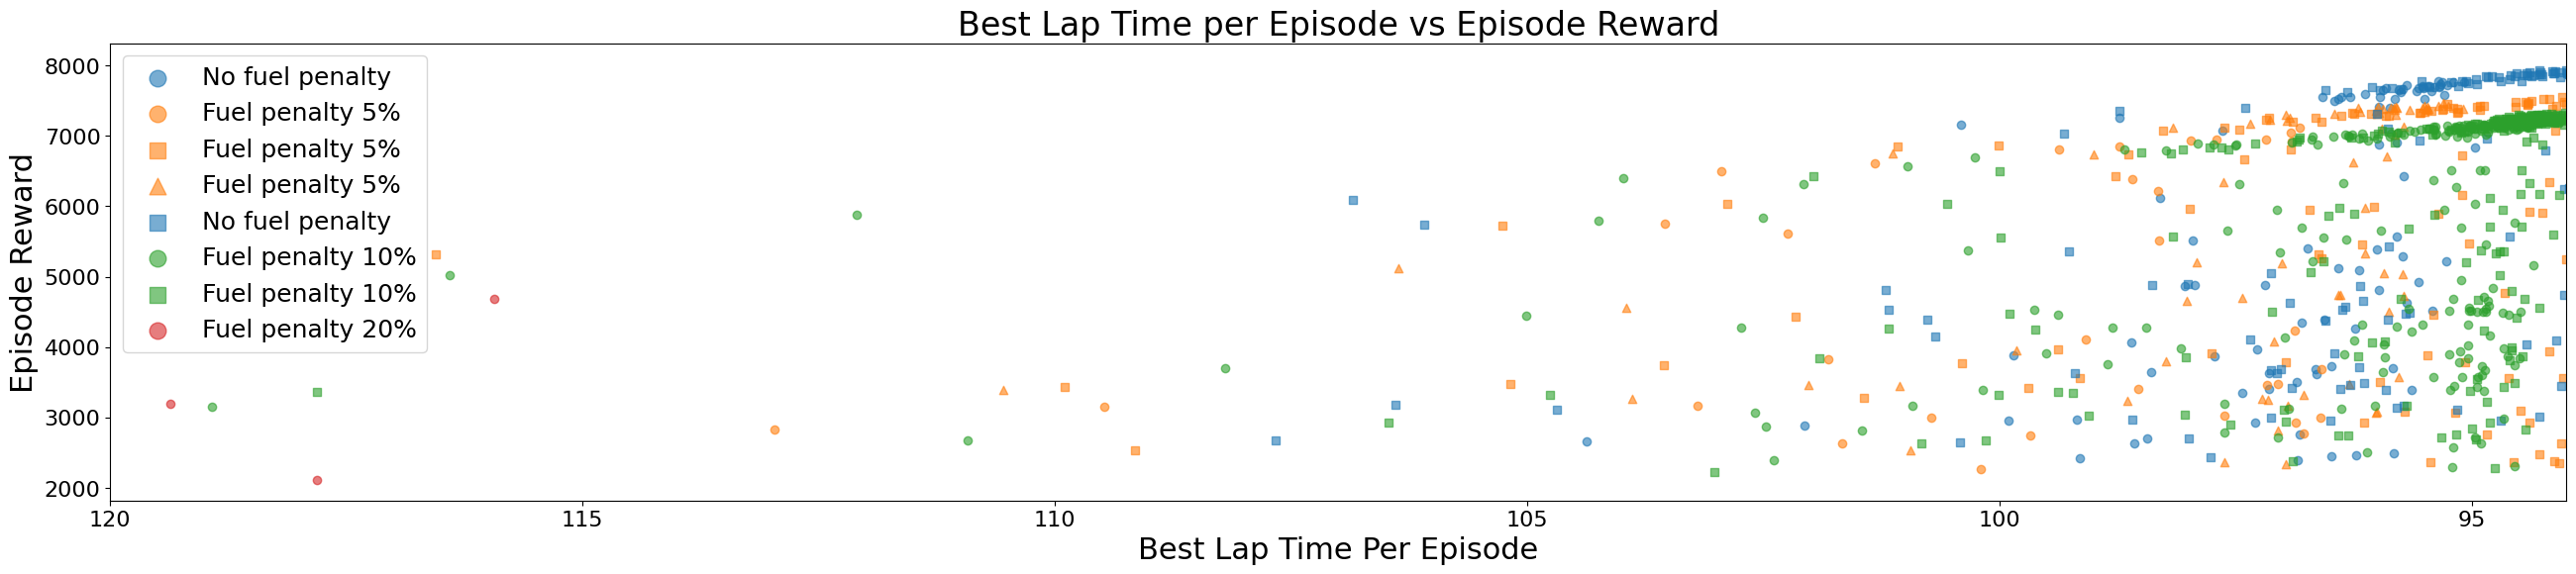

In [20]:
import re
import numpy as np

plt.figure(figsize=(32, 6))
for training_key, training_info in training_infos_redbull_gt3.items():
    df = combine_sequences(training_info)
    combined_df = df[(df['ep_reward'] > 0)]

    lap_time_cols = [col for col in combined_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
    if not lap_time_cols:
        print(f"No lap time columns found in {training_key}")
        continue

    # Compute the best lap time per episode (min across all lap columns)
    best_lap_times = combined_df[lap_time_cols].replace(0, np.nan).min(axis=1)

    # Plot: Episode Count vs Best Lap Time
    plt.scatter(
        best_lap_times,
        combined_df['ep_reward'],
        label=training_info['reward_used'],
        alpha=0.6,
        color=training_info['graph_color'],
        marker=training_info['graph_markers']
    )

plt.xlabel('Best Lap Time Per Episode')
plt.ylabel('Episode Reward')
plt.title('Best Lap Time per Episode vs Episode Reward')
plt.xlim(120, 94)
plt.legend()
plt.show()

## Correlation between Mean Speed Per Episode vs Reward Per Episode

explanation: for no constraints, lowest lap time gives best reward. but with constraints like fuel penalty 5% and fuel penalty 10%, the reward drops, because the lap time is no longer as important. However, when the penalty is set too high, lap time stops being the dominant factor and the model no longer trains to complete the lap

Skipping baseline policy redbull_gt3_baseline_policy


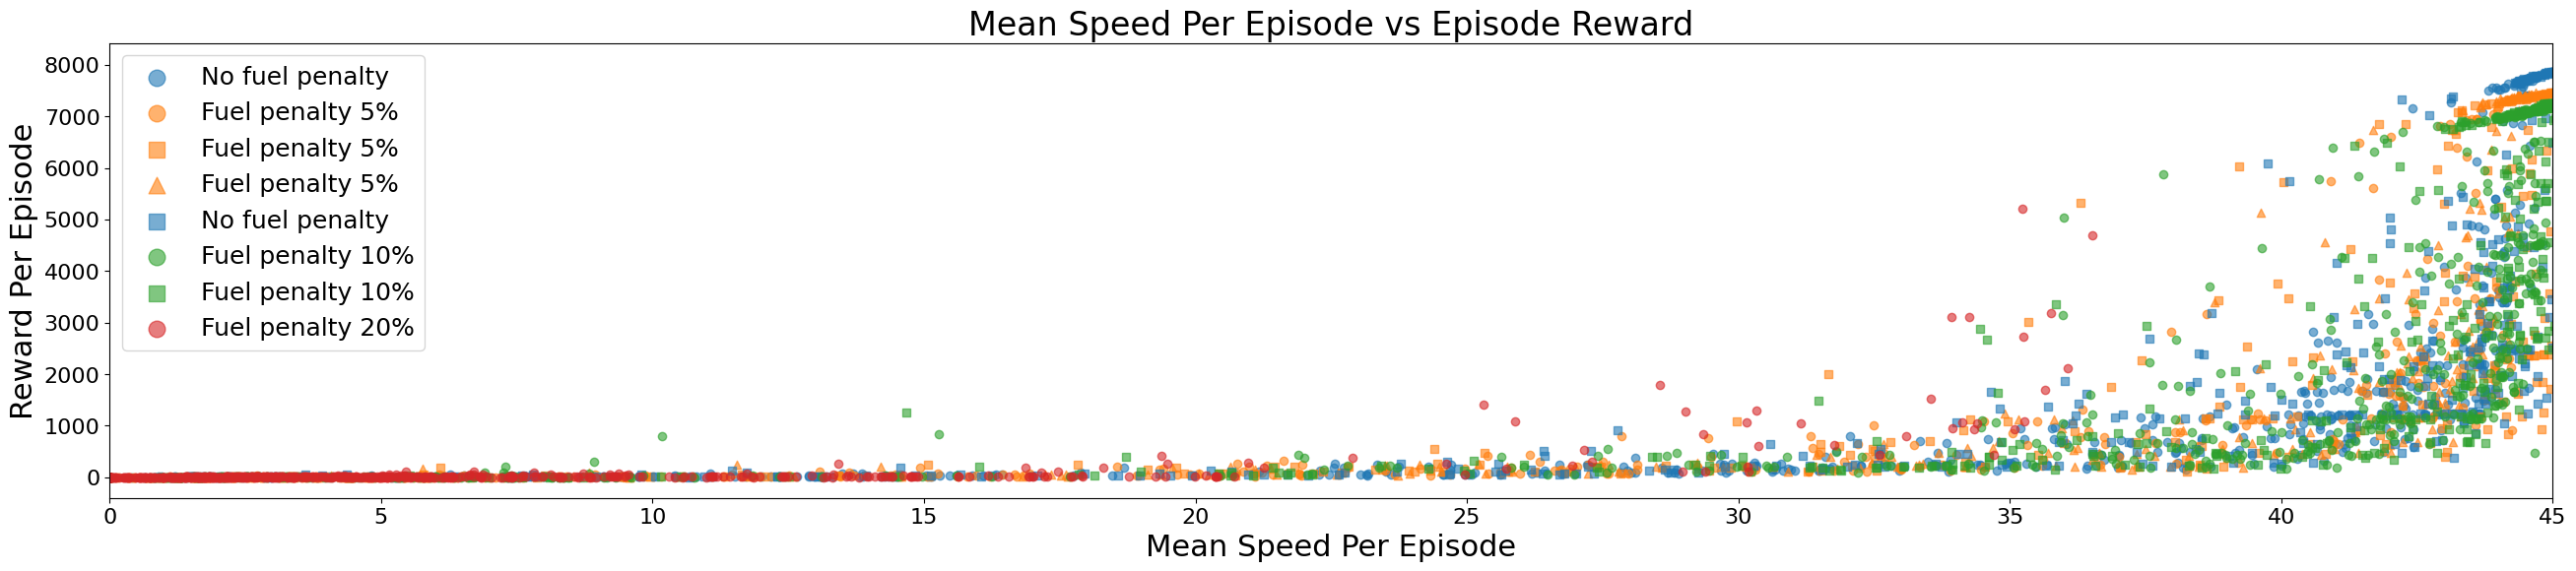

In [21]:
import re
import numpy as np

plt.figure(figsize=(32, 6))
for training_key, training_info in training_infos_redbull_gt3.items():
    if training_key == 'redbull_gt3_baseline_policy':
        print(f'Skipping baseline policy {training_key}')
        continue

    df = combine_sequences(training_info)
    combined_df = df[(df['ep_reward'] > 0)]

    # Plot: Episode Count vs Best Lap Time
    plt.scatter(
        combined_df['speed_mean'],
        combined_df['ep_reward'],
        label=training_info['reward_used'],
        alpha=0.6,
        color=training_info['graph_color'],
        marker=training_info['graph_markers']
    )

plt.xlabel('Mean Speed Per Episode')
plt.ylabel('Reward Per Episode')
plt.title('Mean Speed Per Episode vs Episode Reward')
plt.xlim(0, 45)
plt.legend()
plt.show()